# **Problem 1**

## **Introduction to Business Problem**

###**Defining Problem Statement**

An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.

You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.

Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation. Hence be very careful while providing campaign recommendation.

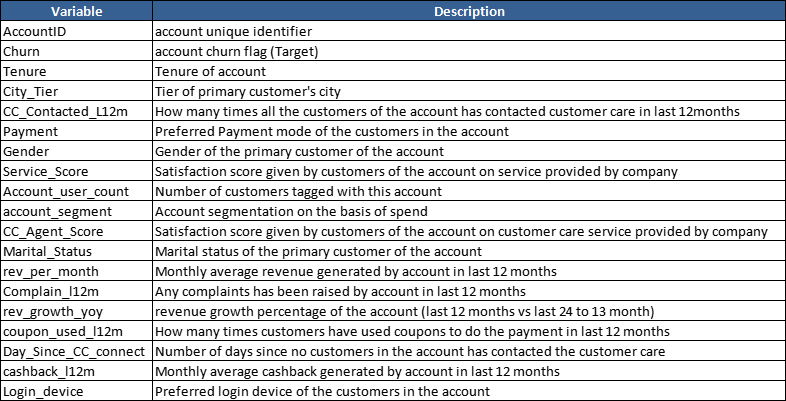

## **Data Report**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }<\style>'))

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Visual inspection of data**

In [3]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_excel("/content/drive/MyDrive/capestone/Customer Churn Data.xlsx")
df.head(5).T

0             1             2           3  \
AccountID                     20000         20001         20002       20003   
Churn                             1             1             1           1   
Tenure                            4             0             0           0   
City_Tier                       3.0           1.0           1.0         3.0   
CC_Contacted_LY                 6.0           8.0          30.0        15.0   
Payment                  Debit Card           UPI    Debit Card  Debit Card   
Gender                       Female          Male          Male        Male   
Service_Score                   3.0           3.0           2.0         2.0   
Account_user_count                3             4             4           4   
account_segment               Super  Regular Plus  Regular Plus       Super   
CC_Agent_Score                  2.0           3.0           3.0         5.0   
Marital_Status               Single        Single        Single      Single   
rev_per_month                     9             7             6           8   
Complain_ly                     1.0           1.0           1.0         0.0   
rev_growth_yoy                   11            15            14          23   
coupon_used_for_payment           1             0             0           0   
Day_Since_CC_connect              5             0             3           3   
cashback                     159.93         120.9           NaN      134.07   
Login_device                 Mobile        Mobile        Mobile      Mobile   

                                    4  
AccountID                       20004  
Churn                               1  
Tenure                              0  
City_Tier                         1.0  
CC_Contacted_LY                  12.0  
Payment                   Credit Card  
Gender                           Male  
Service_Score                     2.0  
Account_user_count                  3  
account_segment          Regular Plus  
CC_Agent_Score                    5.0  
Marital_Status                 Single  
rev_per_month                       3  
Complain_ly                       0.0  
rev_growth_yoy                     11  
coupon_used_for_payment             1  
Day_Since_CC_connect                3  
cashback                        129.6  
Login_device                   Mobile

In [4]:
df.shape

(11260, 19)

In [5]:
df.nunique()

AccountID                  11260
Churn                          2
Tenure                        38
City_Tier                      3
CC_Contacted_LY               44
Payment                        5
Gender                         4
Service_Score                  6
Account_user_count             7
account_segment                7
CC_Agent_Score                 5
Marital_Status                 3
rev_per_month                 59
Complain_ly                    2
rev_growth_yoy                20
coupon_used_for_payment       20
Day_Since_CC_connect          24
cashback                    5684
Login_device                   3
dtype: int64

In [6]:
df.duplicated().sum()

0

#### **Value Counts - Numerical**

In [7]:
def value_counts_numerical(data):
    """
    Displays value counts for all numerical columns in the dataset.

    Parameters:
    data (pd.DataFrame): The dataset containing numerical variables.

    Returns:
    None
    """
    numerical_columns = data.select_dtypes(include=['number']).columns

    for col in numerical_columns:
        print(f"Value Counts for '{col}':\n")
        print(data[col].value_counts())
        print("\n")

value_counts_numerical(df)

Value Counts for 'AccountID':

AccountID
20000    1
27510    1
27502    1
27503    1
27504    1
        ..
23754    1
23755    1
23756    1
23757    1
31259    1
Name: count, Length: 11260, dtype: int64


Value Counts for 'Churn':

Churn
0    9364
1    1896
Name: count, dtype: int64


Value Counts for 'City_Tier':

City_Tier
1.0    7263
3.0    3405
2.0     480
Name: count, dtype: int64


Value Counts for 'CC_Contacted_LY':

CC_Contacted_LY
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
28.0     178
34.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
127.0      1
126.0      1
132.0      1
4.0       

#### **Value Counts - Categorical**

In [8]:
def value_counts_categorical(data):
    """
    Calculates the value counts for categorical columns in a DataFrame.

    Args:
        data (pd.DataFrame): The input DataFrame.

    Returns:
        dict: A dictionary containing the value counts for each categorical column.
    """
    import pandas as pd
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    value_counts = {}
    for col in categorical_cols:
        value_counts[col] = data[col].value_counts()
    return value_counts

value_counts = value_counts_categorical(df)

In [9]:
value_counts['Payment']

Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: count, dtype: int64

In [10]:
value_counts['Gender']

Gender
Male      6328
Female    4178
M          376
F          270
Name: count, dtype: int64

In [11]:
value_counts['account_segment']

account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: count, dtype: int64

In [12]:
value_counts['Marital_Status']

Marital_Status
Married     5860
Single      3520
Divorced    1668
Name: count, dtype: int64

In [13]:
value_counts['Login_device']

Login_device
Mobile      7482
Computer    3018
&&&&         539
Name: count, dtype: int64

In [14]:
print(value_counts['Tenure'])

invalid_elements = df['Tenure'][~df['Tenure'].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x))]

print("Invalid elements in 'Tenure' column:")
print(invalid_elements.unique())

Tenure
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: count, dtype: int64
Invalid elements in 'Tenure' column:
['#']


In [15]:
print(value_counts['rev_per_month'])

invalid_elements = df['rev_per_month'][~df['rev_per_month'].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x))]

print("Invalid elements in 'rev_per_month' column:")
print(invalid_elements.unique())

rev_per_month
3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
123       5
124       5
107       5
136       4
140       4
118       4
133       4
129       4
115       3
117       3
138       3
101       3
110       3
137       3
119       3
108       3
127       3
116       3
126       3
130       3
113       3
120       2
19        2
131       2
139       2
114       2
125       2
22        2
121       2
105       2
134       2
20        1
23        1
122       1
21        1
104       1
25        1
135       1
111       1
109       1
100       1
103       1
Name: count, dtype: int64
Invalid elements in 'rev_per_month' column:
['+']


In [16]:
print(value_counts['rev_growth_yoy'])

invalid_elements = df['rev_growth_yoy'][~df['rev_growth_yoy'].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x))]

print("Invalid elements in 'rev_growth_yoy' column:")
print(invalid_elements.unique())

rev_growth_yoy
14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: count, dtype: int64
Invalid elements in 'rev_growth_yoy' column:
['$']


In [17]:
print(value_counts['Day_Since_CC_connect'])

invalid_elements = df['Day_Since_CC_connect'][~df['Day_Since_CC_connect'].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x))]

print("Invalid elements in 'Day_Since_CC_connect' column:")
print(invalid_elements.unique())

Day_Since_CC_connect
3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
$        1
46       1
Name: count, dtype: int64
Invalid elements in 'Day_Since_CC_connect' column:
['$']


In [18]:
print(value_counts['Account_user_count'])

invalid_elements = df['Account_user_count'][~df['Account_user_count'].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x))]

print("Invalid elements in 'Account_user_count' column:")
print(invalid_elements.unique())

Account_user_count
4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: count, dtype: int64
Invalid elements in 'Account_user_count' column:
['@']


In [19]:
print(value_counts['coupon_used_for_payment'])

invalid_elements = df['coupon_used_for_payment'][~df['coupon_used_for_payment'].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x))]

print("Invalid elements in 'coupon_used_for_payment' column:")
print(invalid_elements.unique())

coupon_used_for_payment
1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: count, dtype: int64
Invalid elements in 'coupon_used_for_payment' column:
['#' '$' '*']


In [20]:
print(value_counts['cashback'])

invalid_elements = df['cashback'][~df['cashback'].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x))]

print("Invalid elements in 'cashback' column:")
print(invalid_elements.unique())

cashback
155.62    10
149.36     9
145.08     9
154.73     9
149.68     9
          ..
167.10     1
222.78     1
276.68     1
131.55     1
191.42     1
Name: count, Length: 5684, dtype: int64
Invalid elements in 'cashback' column:
['$']


In [21]:
df.describe()

AccountID         Churn     City_Tier  CC_Contacted_LY  \
count  11260.00000  11260.000000  11148.000000     11158.000000   
mean   25629.50000      0.168384      1.653929        17.867091   
std     3250.62635      0.374223      0.915015         8.853269   
min    20000.00000      0.000000      1.000000         4.000000   
25%    22814.75000      0.000000      1.000000        11.000000   
50%    25629.50000      0.000000      1.000000        16.000000   
75%    28444.25000      0.000000      3.000000        23.000000   
max    31259.00000      1.000000      3.000000       132.000000   

       Service_Score  CC_Agent_Score   Complain_ly  
count   11162.000000    11144.000000  10903.000000  
mean        2.902526        3.066493      0.285334  
std         0.725584        1.379772      0.451594  
min         0.000000        1.000000      0.000000  
25%         2.000000        2.000000      0.000000  
50%         3.000000        3.000000      0.000000  
75%         3.000000        4.000000      1.000000  
max         5.000000        5.000000      1.000000

### **Understanding of Attributes**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [4]:
df['Gender'] = df['Gender'].replace({'M': 'Male'})
df['Gender'] = df['Gender'].replace({'F': 'Female'})

In [5]:
df['account_segment'] = df['account_segment'].replace({'Super +': 'Super Plus'})
df['account_segment'] = df['account_segment'].replace({'Regular +': 'Regular Plus'})

In [6]:
df['Login_device'] = df['Login_device'].replace('&&&&', np.nan)
df['Tenure'] = df['Tenure'].replace('#', np.nan)
df['rev_per_month'] = df['rev_per_month'].replace('+', np.nan)
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$', np.nan)
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$', np.nan)
df['Account_user_count'] = df['Account_user_count'].replace('@', np.nan)

df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#', np.nan)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('$', np.nan)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*', np.nan)

df['cashback'] = df['cashback'].replace('$', np.nan)

In [7]:
df['Tenure'] = pd.to_numeric(df['Tenure'], errors='coerce')
df['rev_per_month'] = pd.to_numeric(df['rev_per_month'], errors='coerce')
df['rev_growth_yoy'] = pd.to_numeric(df['rev_growth_yoy'], errors='coerce')
df['Day_Since_CC_connect'] = pd.to_numeric(df['Day_Since_CC_connect'], errors='coerce')
df['Account_user_count'] = pd.to_numeric(df['Account_user_count'], errors='coerce')
df['coupon_used_for_payment'] = pd.to_numeric(df['coupon_used_for_payment'], errors='coerce')
df['cashback'] = pd.to_numeric(df['cashback'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

## **Exploratory Data Analysis**

### **Univariate Analysis**

In [9]:
sns.set(style="whitegrid")

In [29]:
def plot_histogram_with_boxplot(df):
    """
    Plots a histogram and boxplot together for all numerical variables in the DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing numerical variables.

    Returns:
        None
    """

    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    for column in numerical_columns:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True, bins=30, color='blue', alpha=0.7)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column], color='orange')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)

        plt.tight_layout()
        plt.show()

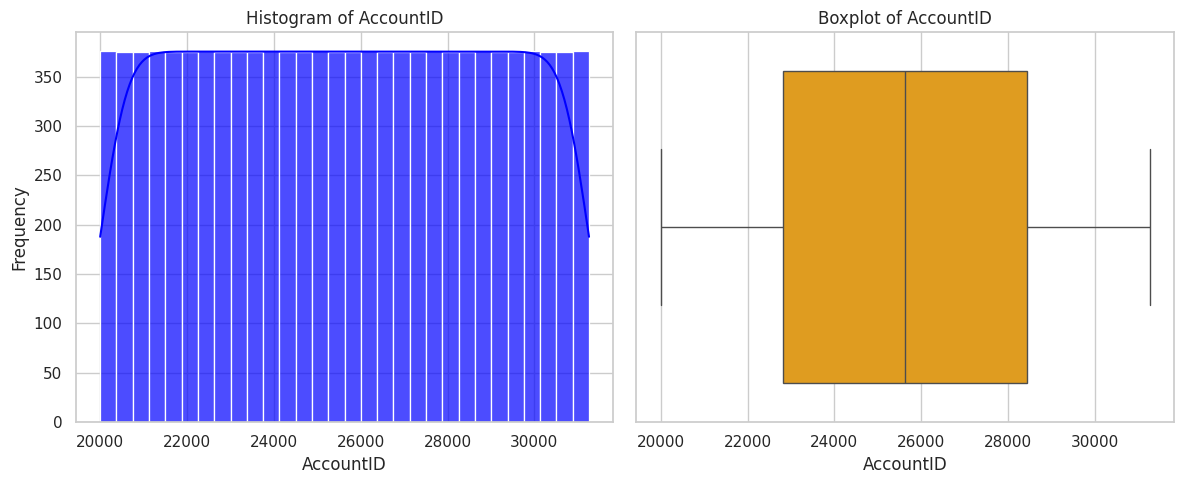

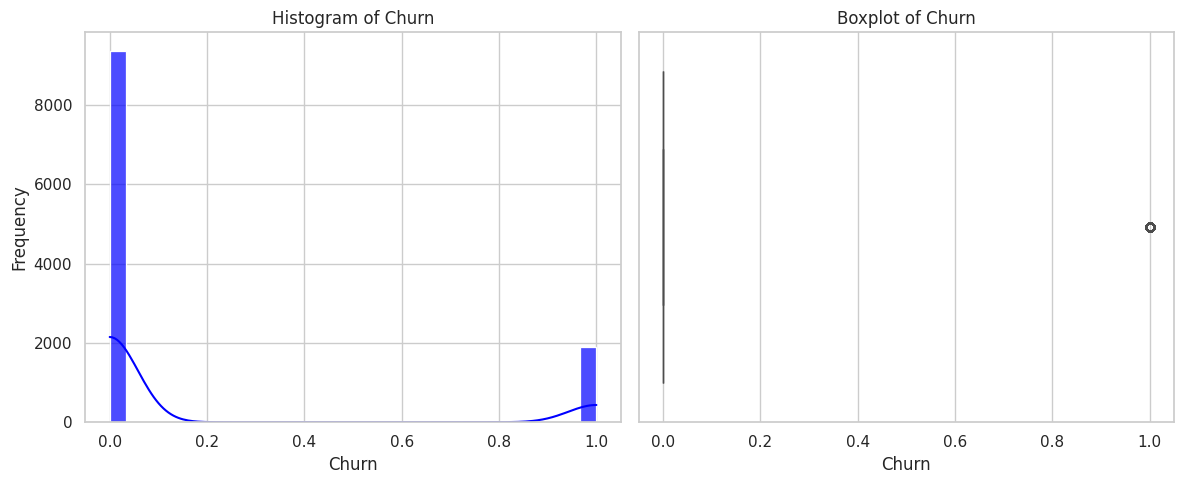

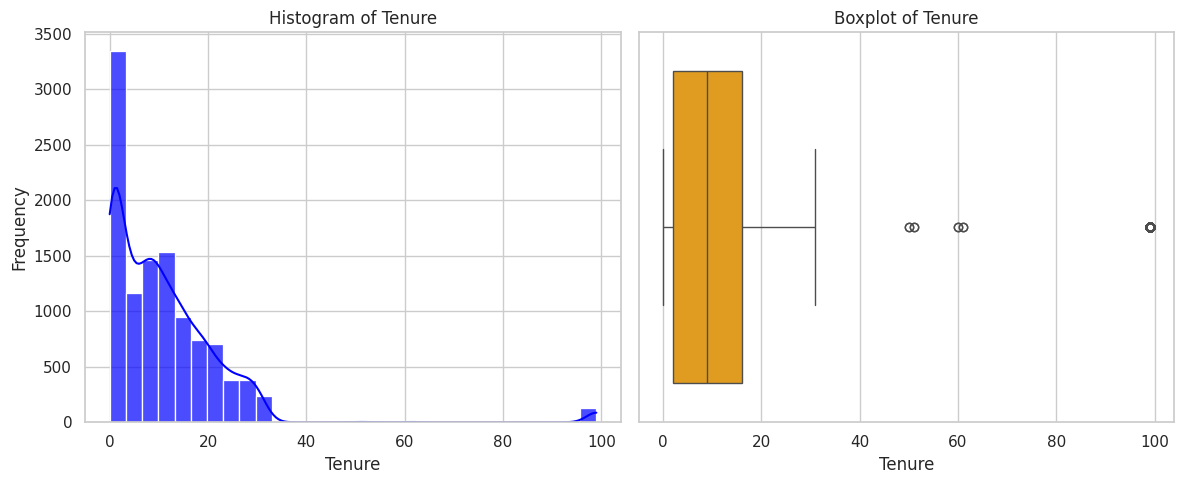

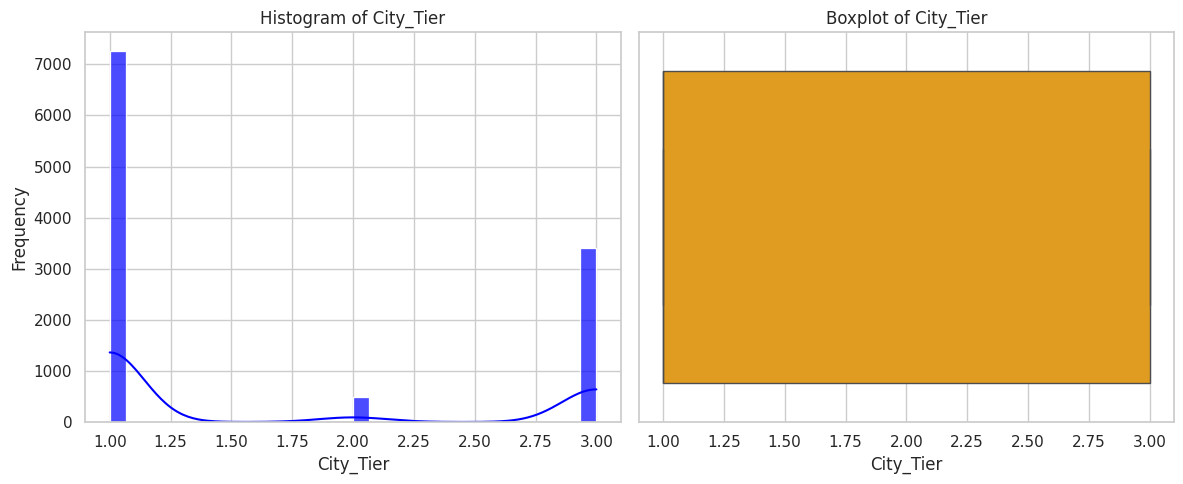

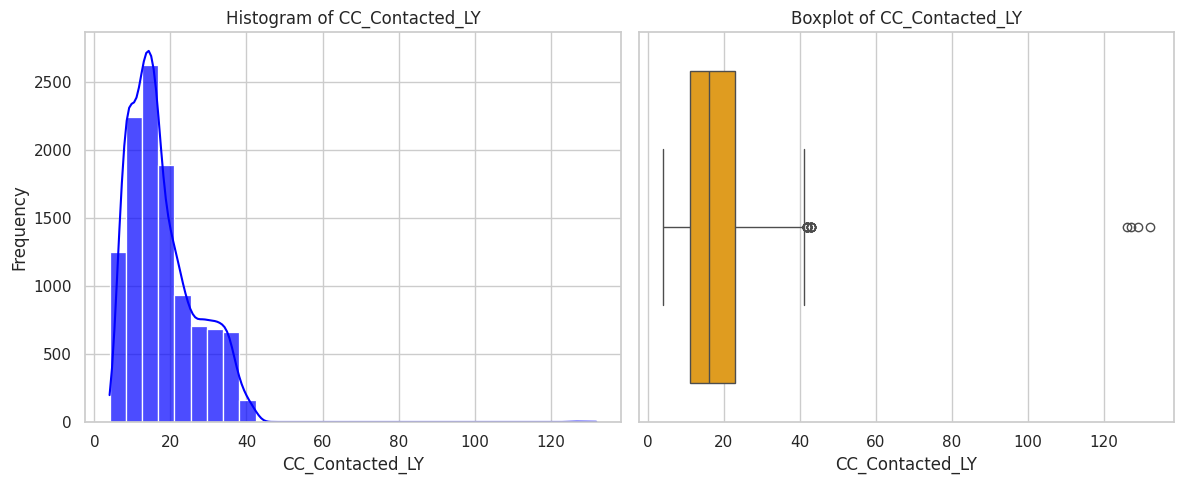

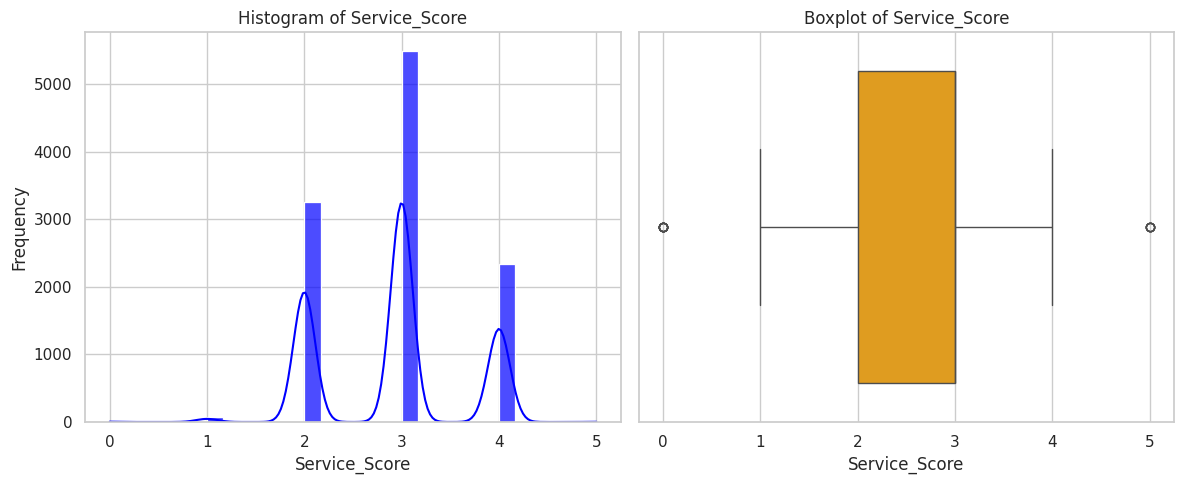

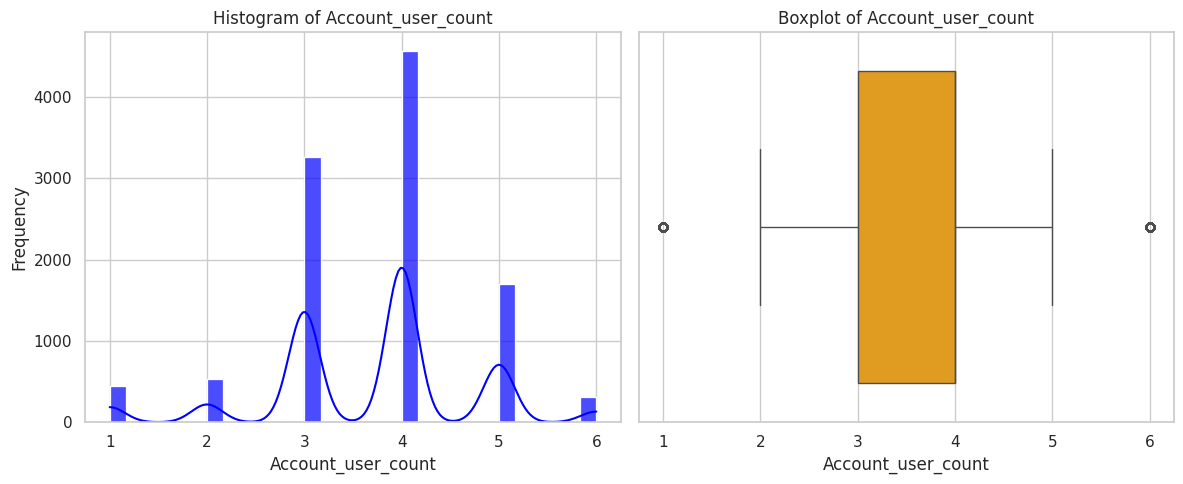

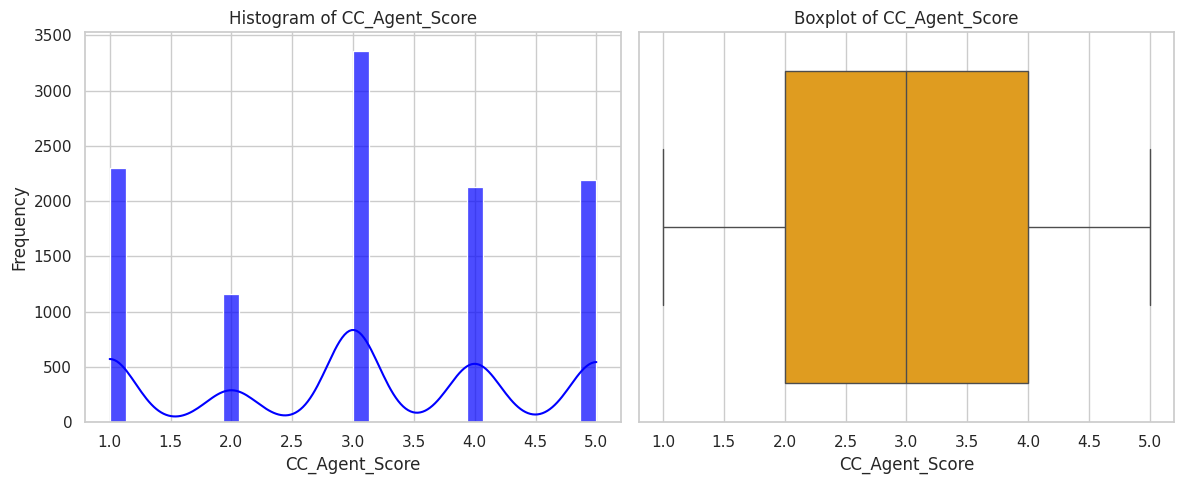

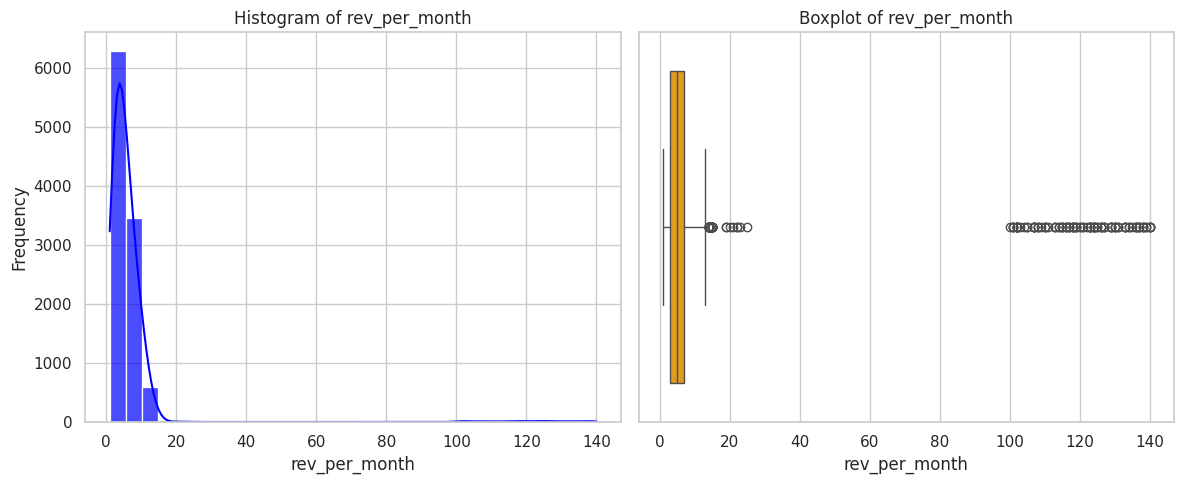

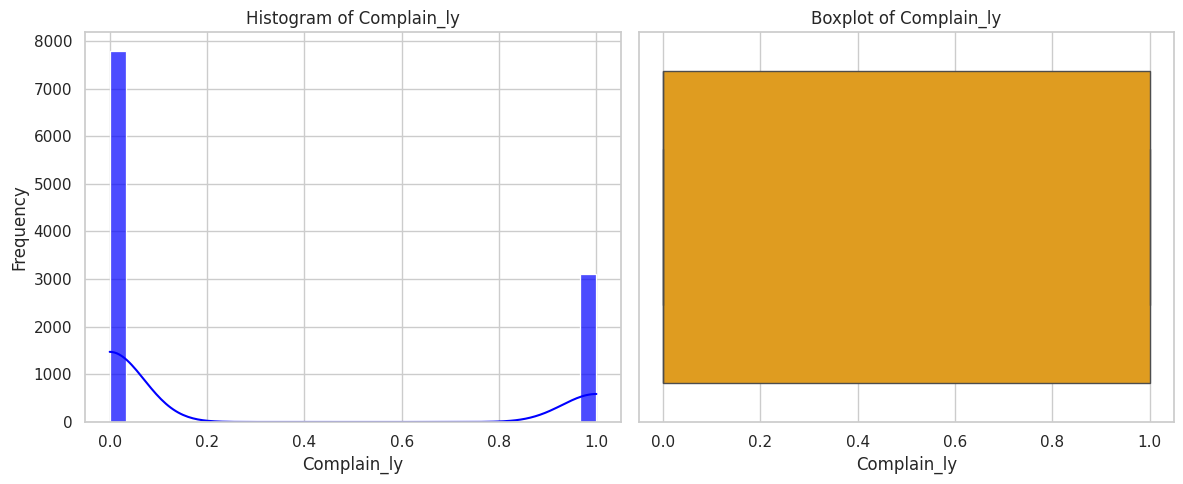

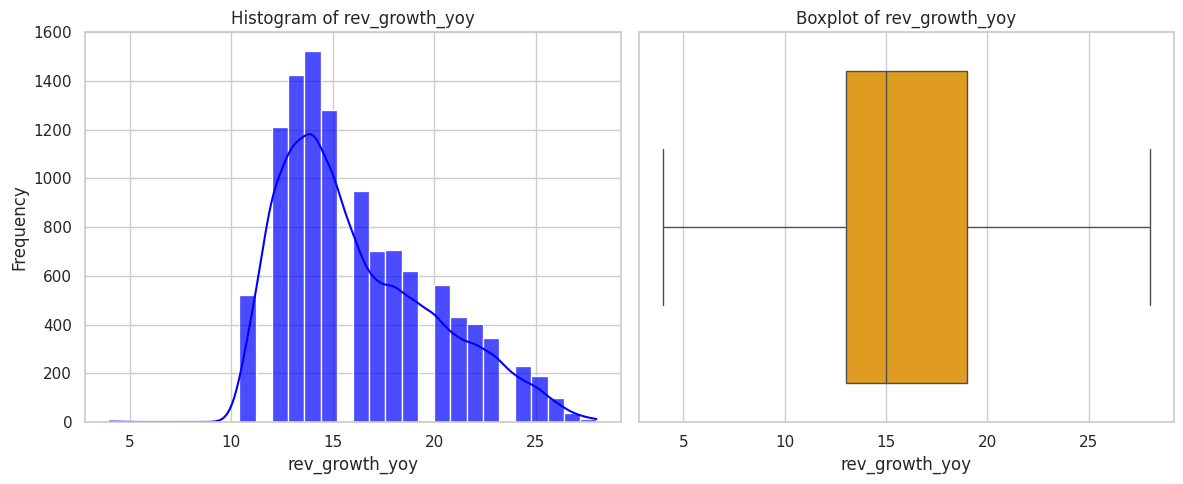

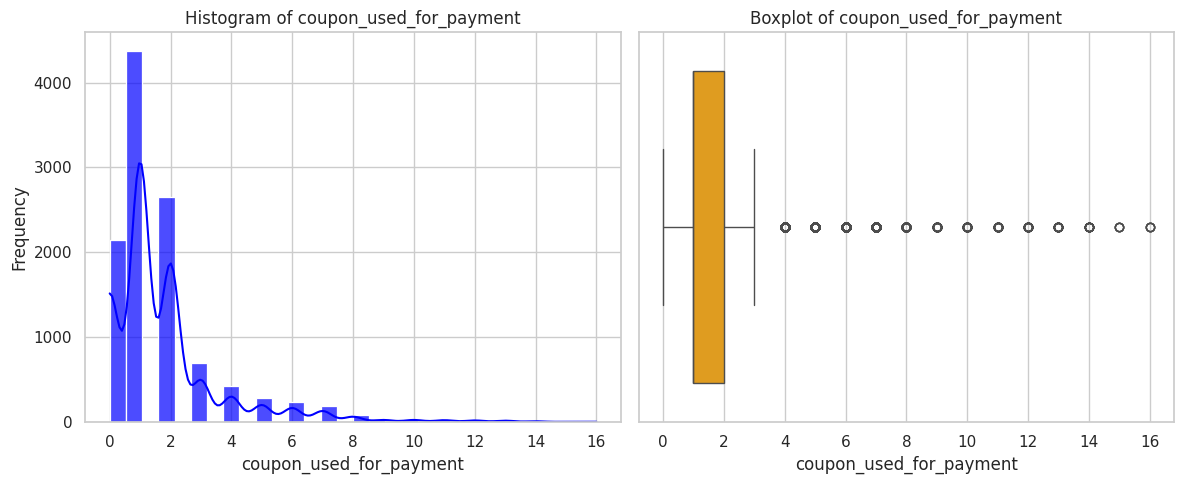

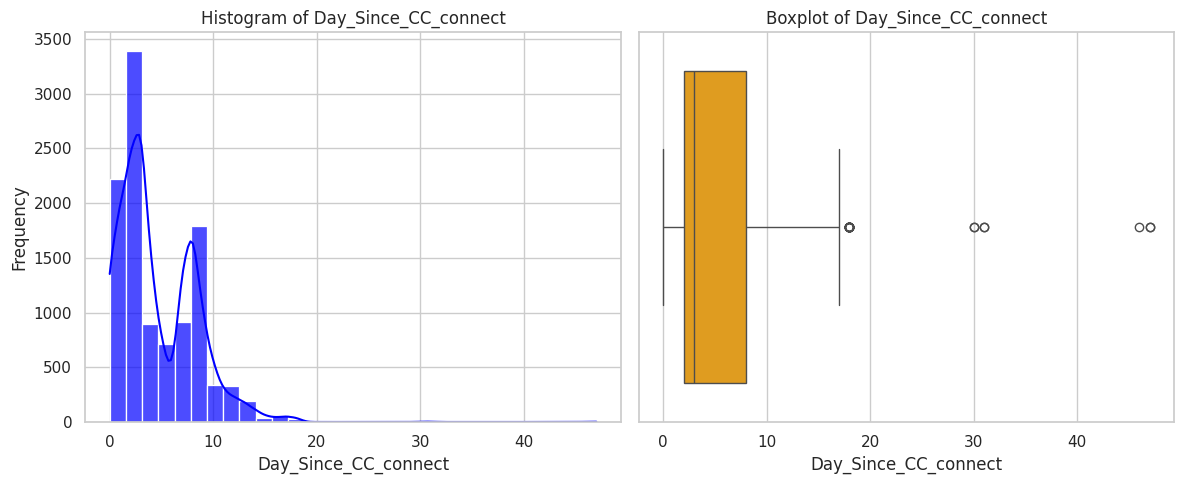

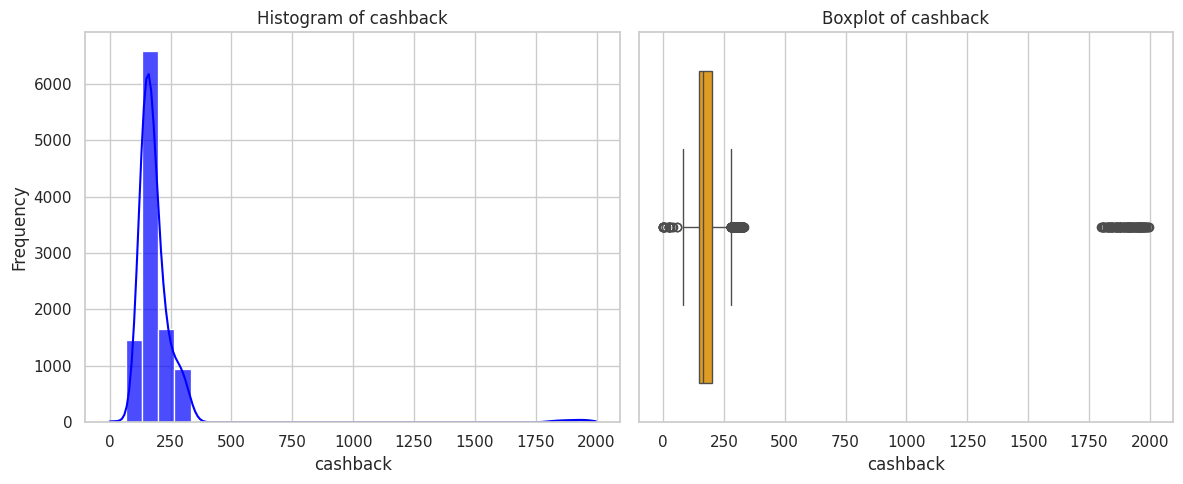

In [30]:
plot_histogram_with_boxplot(df)

In [31]:
def plot_categorical_distribution(data, columns=None):
    """
    Plots a count plot and pie chart together for all categorical variables in the dataset.

    Parameters:
    data (pd.DataFrame): The dataset containing categorical variables.
    columns (list, optional): List of specific columns to plot. If None, all categorical columns are considered.

    Returns:
    None
    """

    if columns is None:
        columns = data.select_dtypes(include=['object', 'category']).columns

    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 8))
        fig.suptitle(f'Distribution for {col}', fontsize=16)

        sns.countplot(data=data, x=col, ax=axes[0], palette='viridis')
        axes[0].set_title('Count Plot')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')
        axes[0].tick_params(axis='x', rotation=45)

        data[col].value_counts().plot.pie(
            autopct='%1.1f%%', ax=axes[1], colors=sns.color_palette('Set2', len(data[col].unique())),
            startangle=90, wedgeprops={'edgecolor': 'black'}
        )
        axes[1].set_title('Pie Chart')
        axes[1].set_ylabel('')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

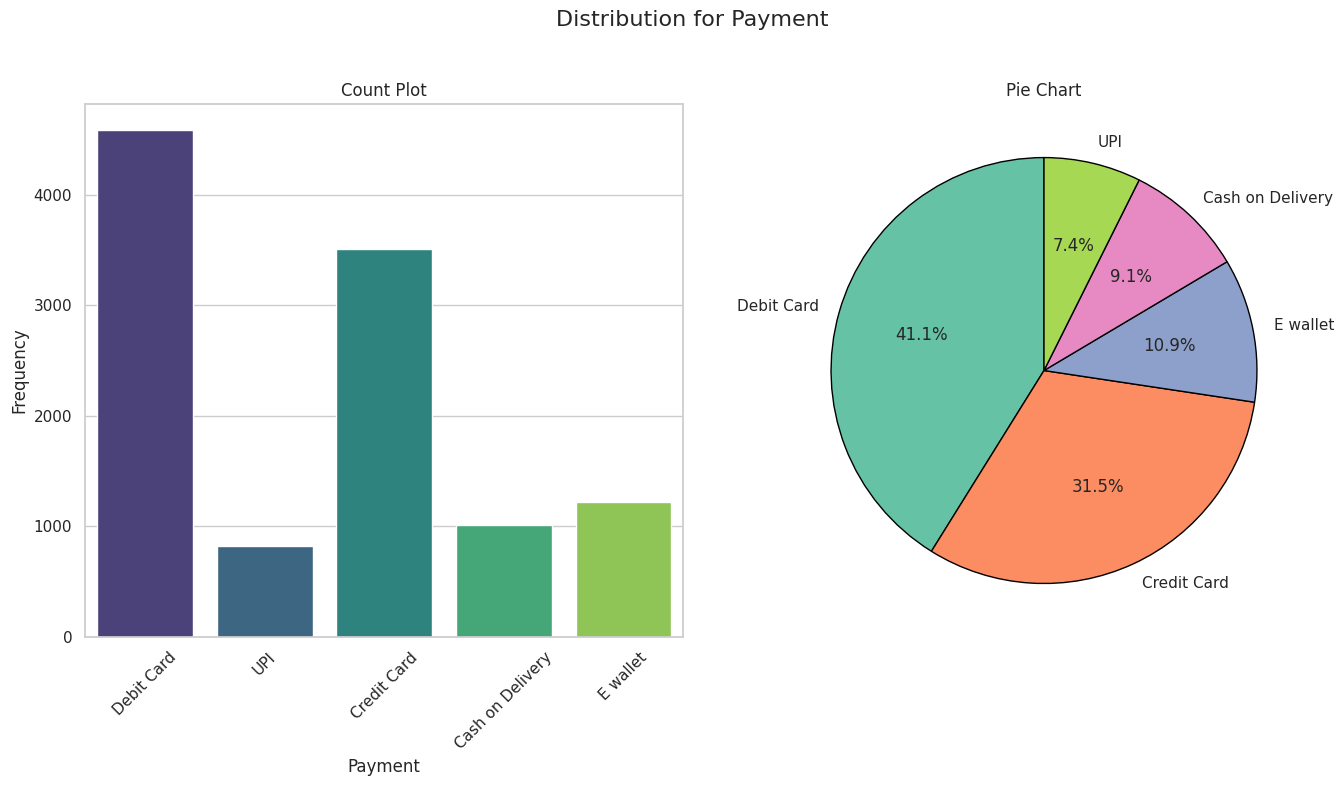

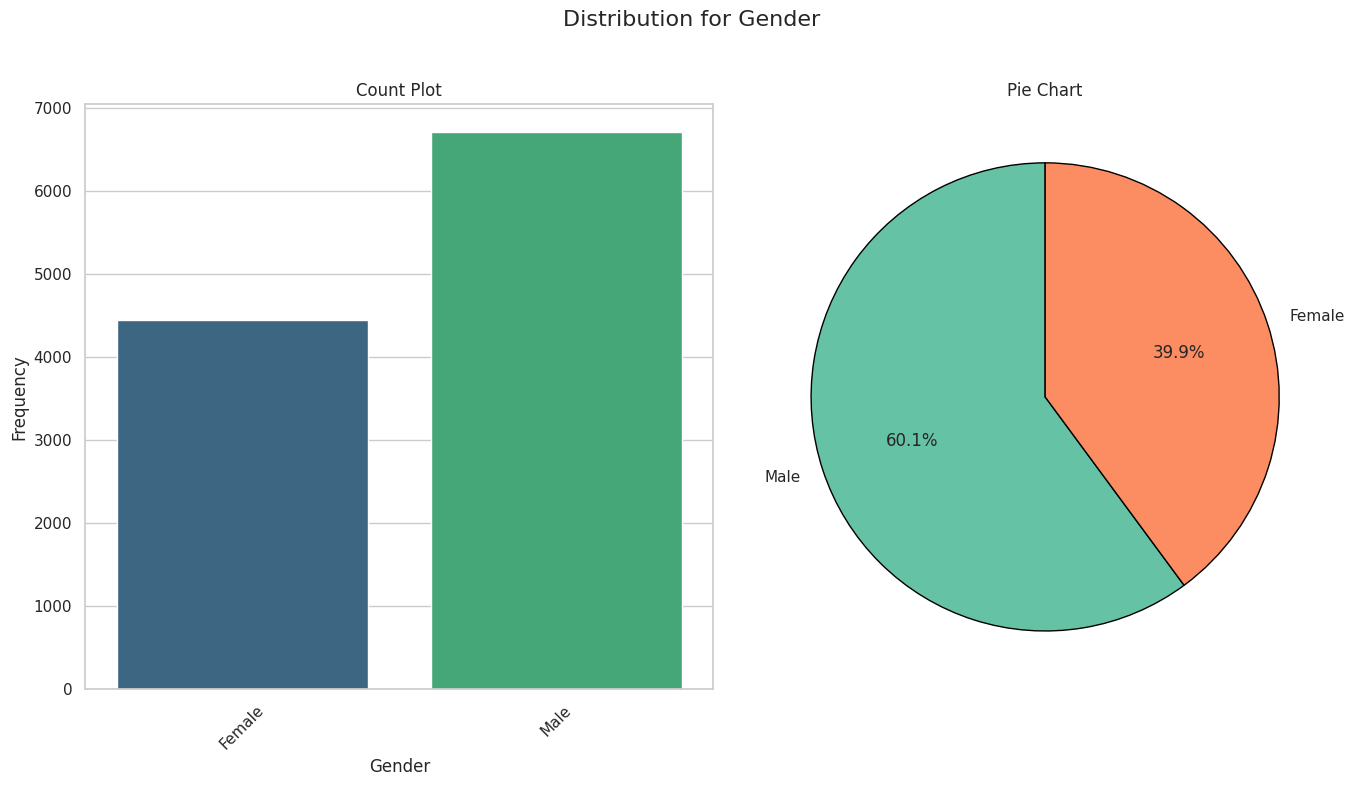

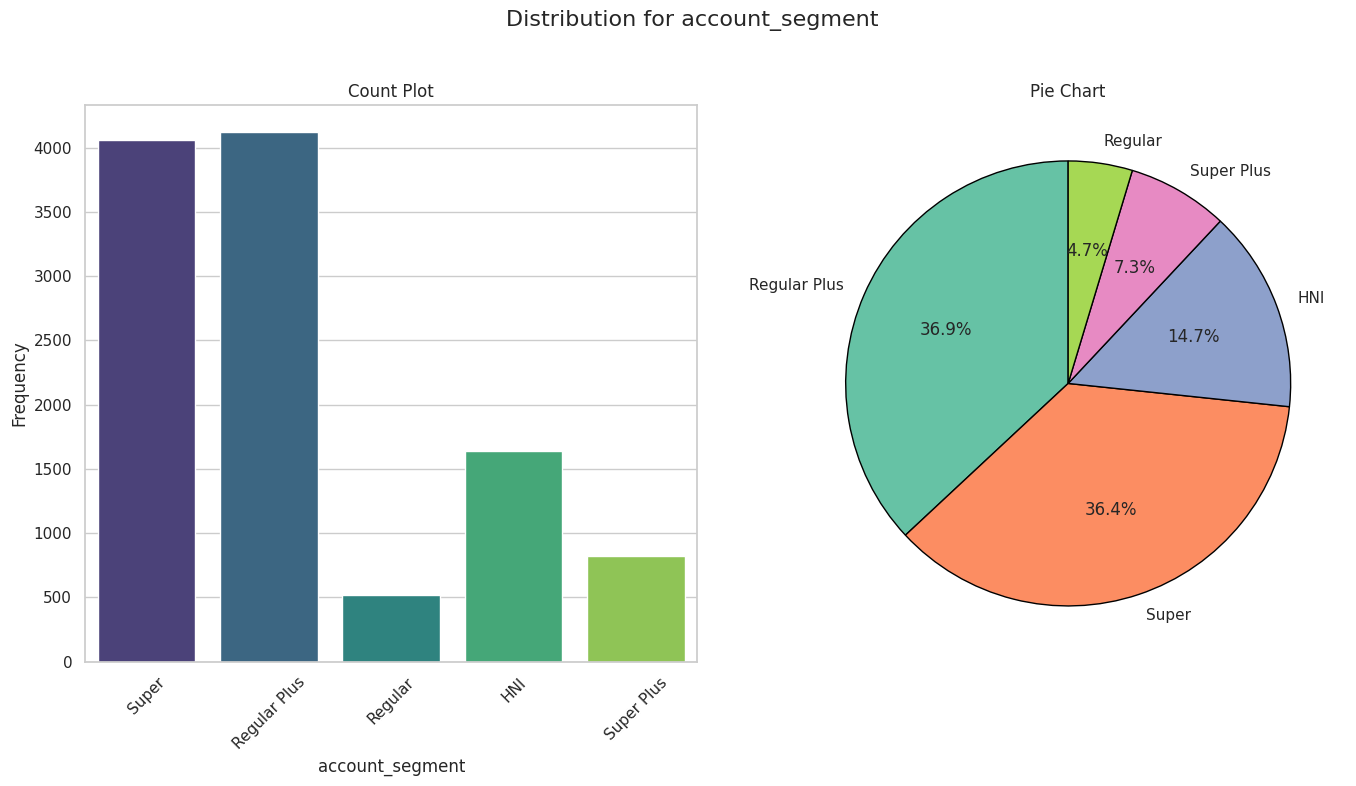

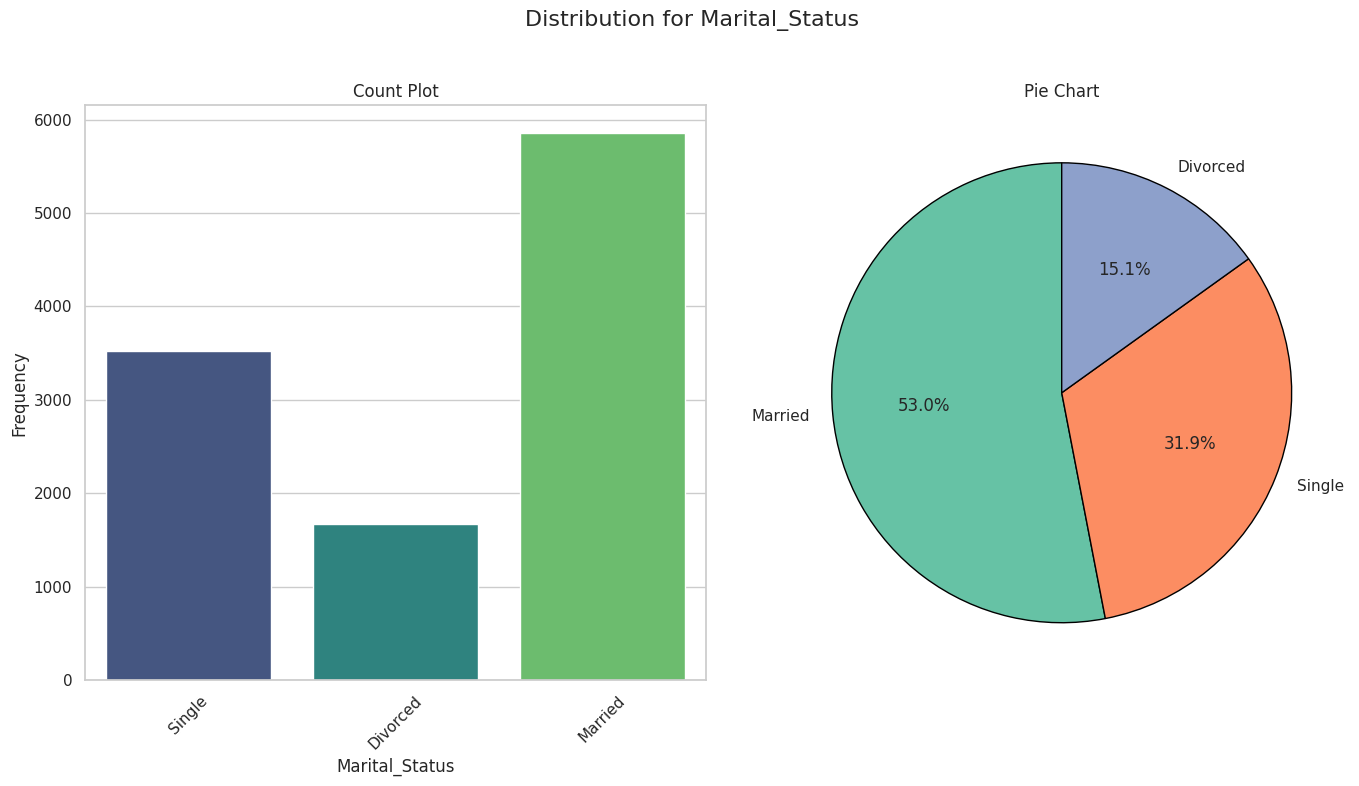

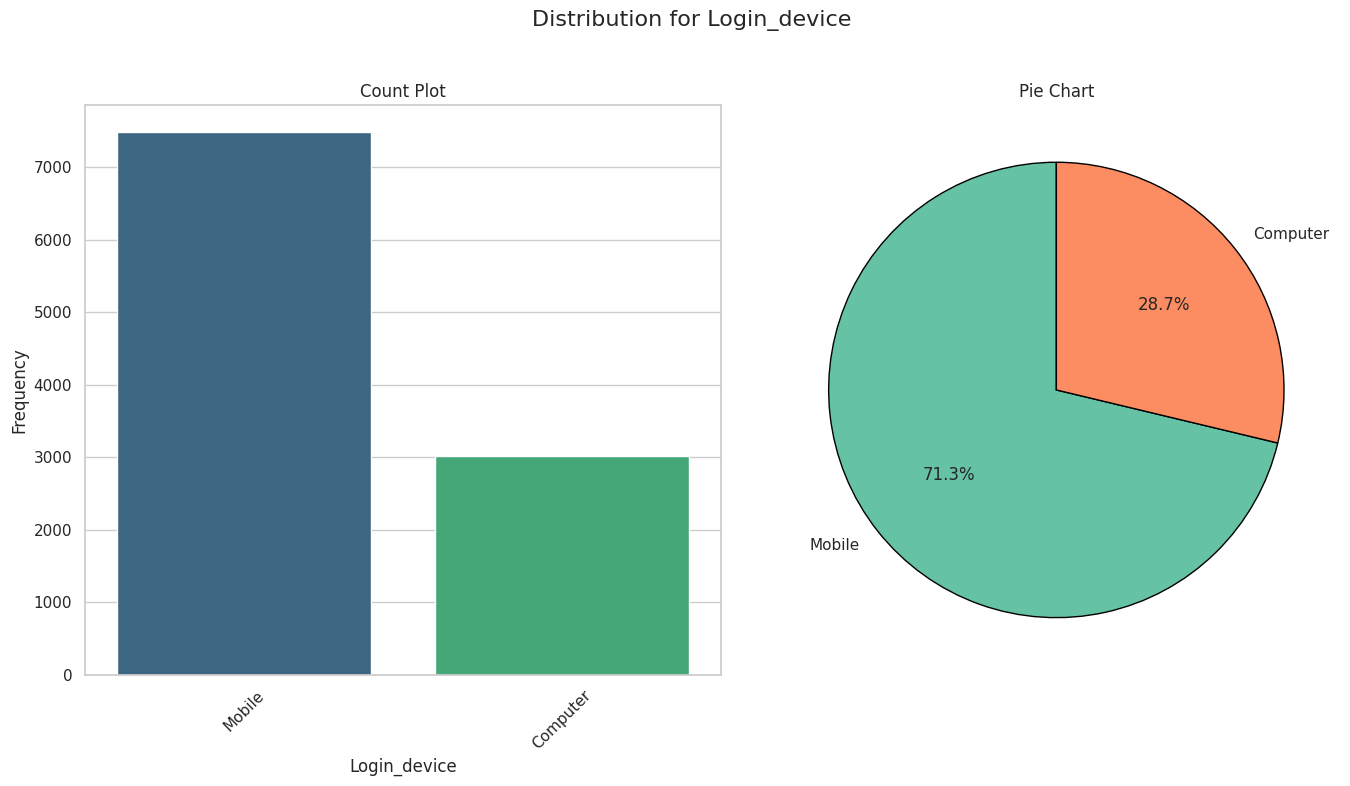

In [32]:
plot_categorical_distribution(df)

### **Bi-variate Analysis**

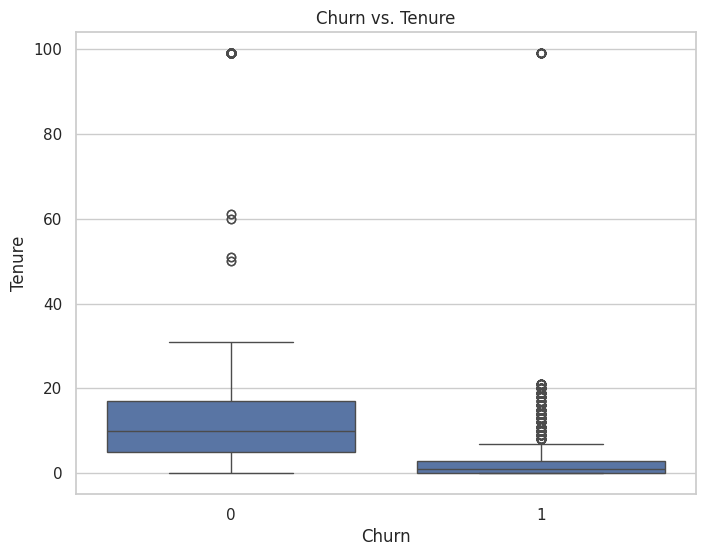

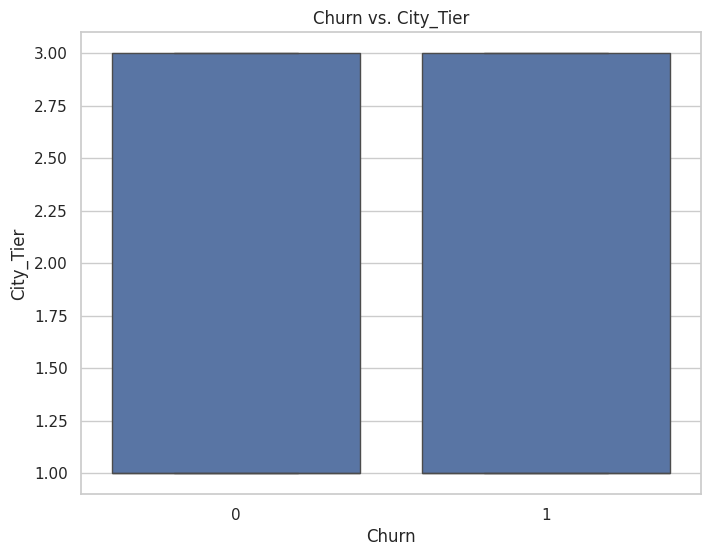

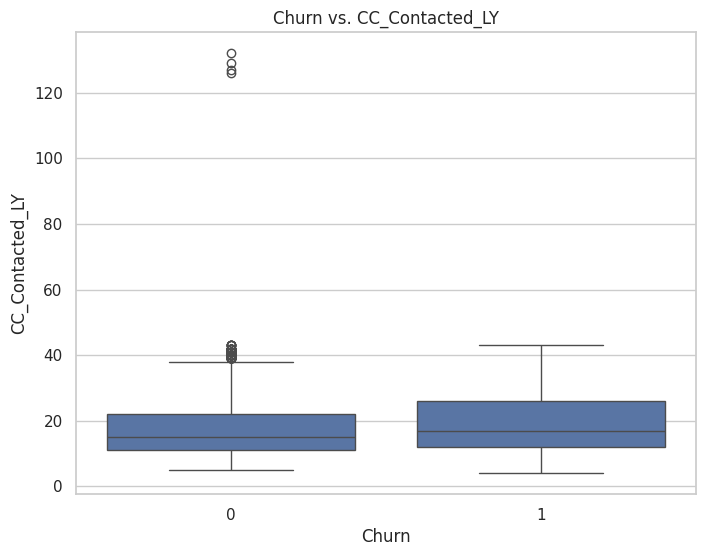

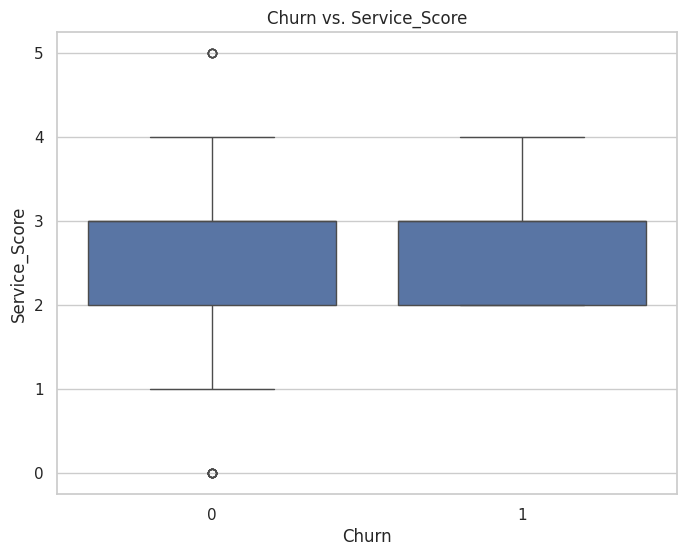

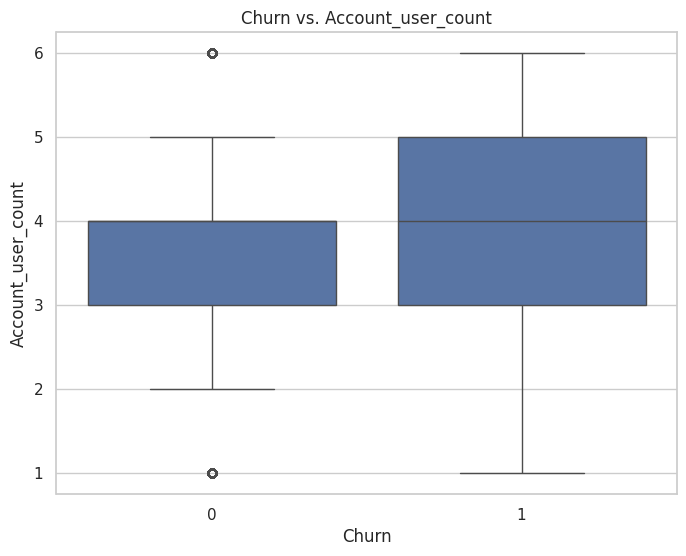

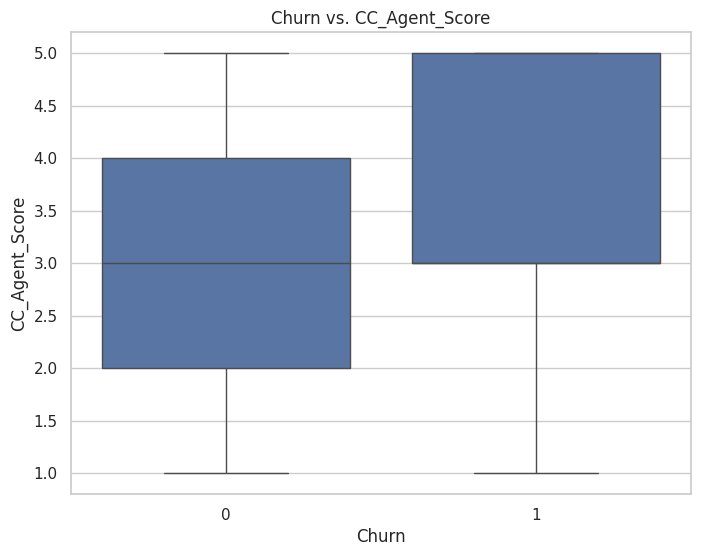

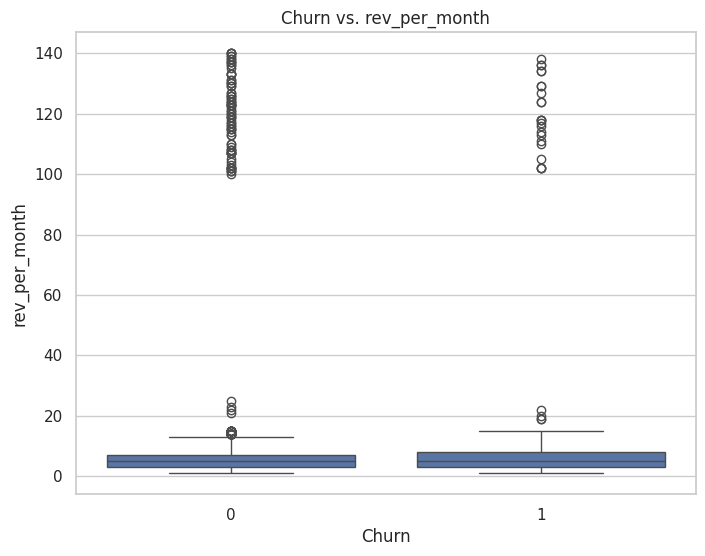

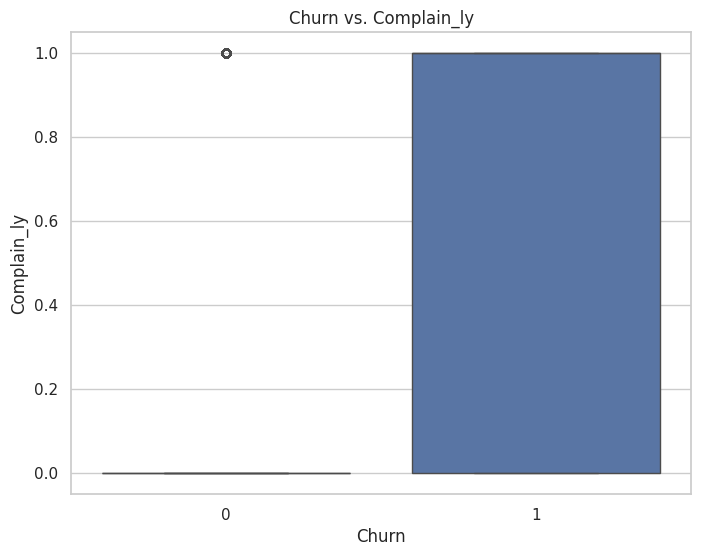

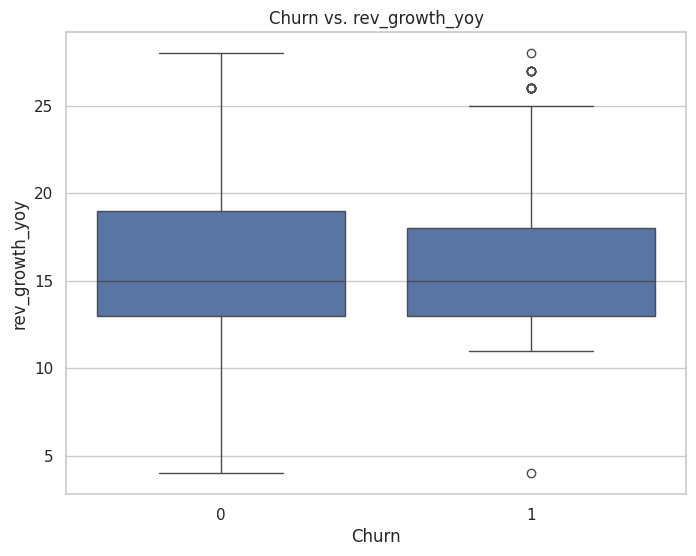

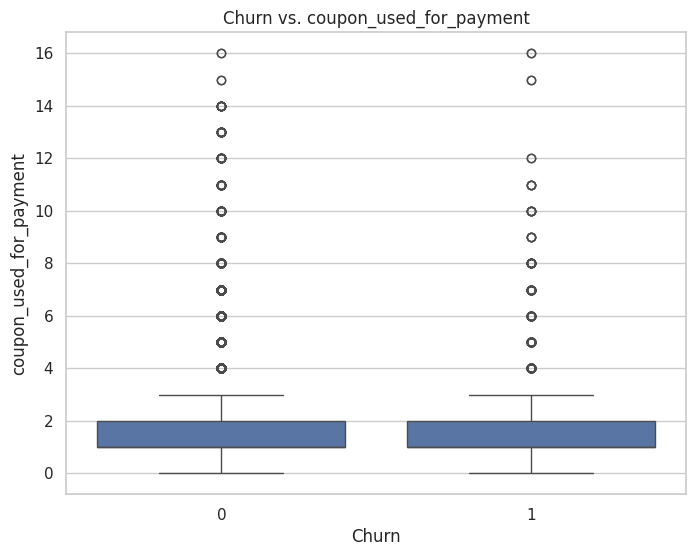

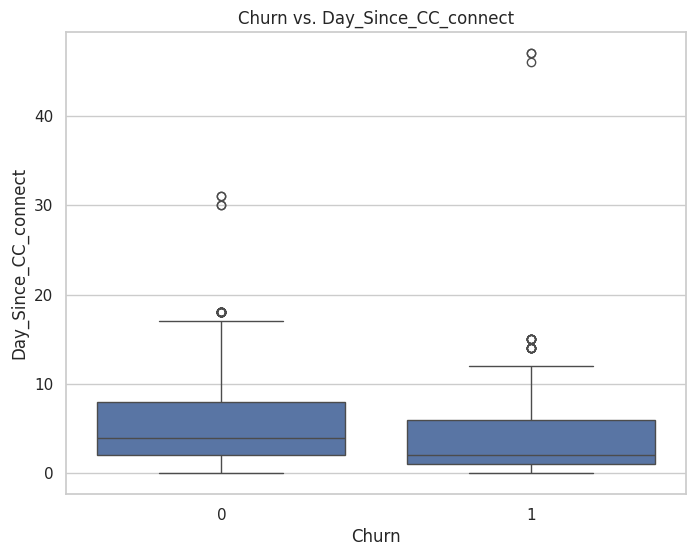

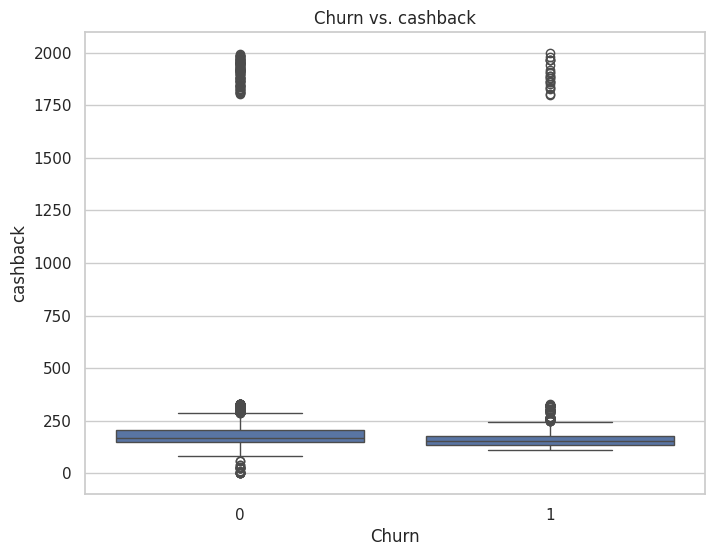

In [33]:
continuous_vars = ['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count',
                   'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Churn', y=var)
    plt.title(f'Churn vs. {var}')
    plt.show()

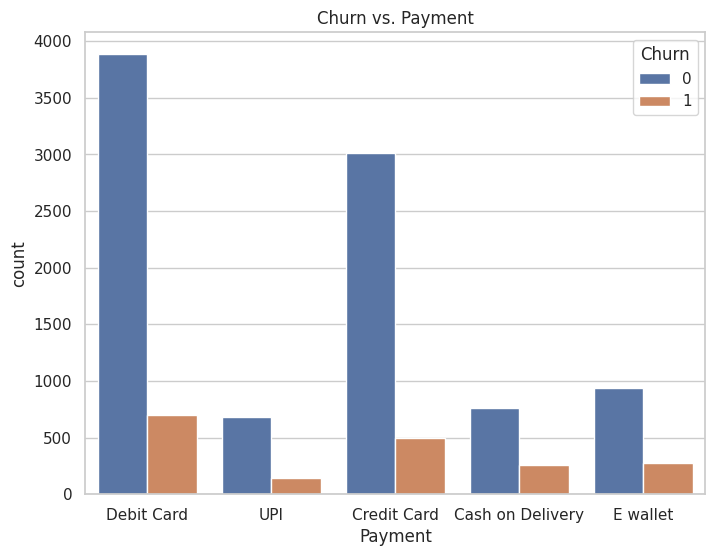

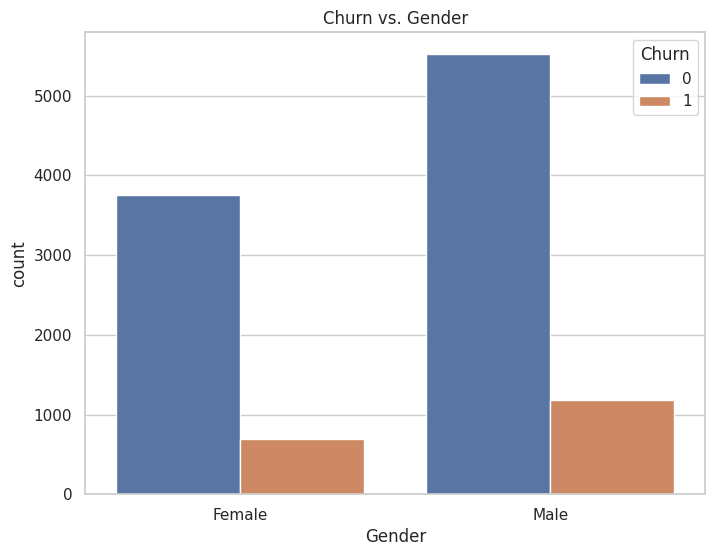

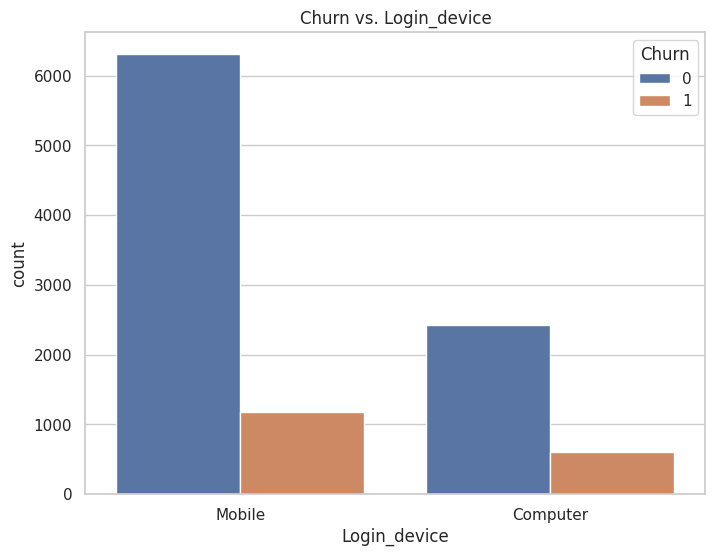

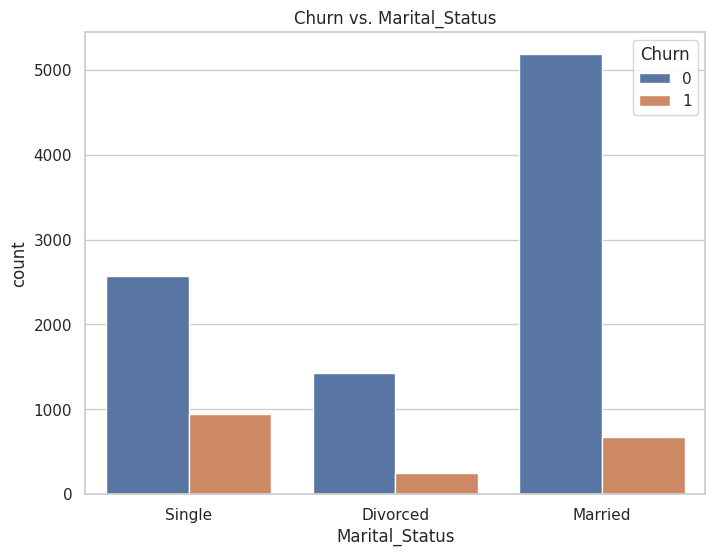

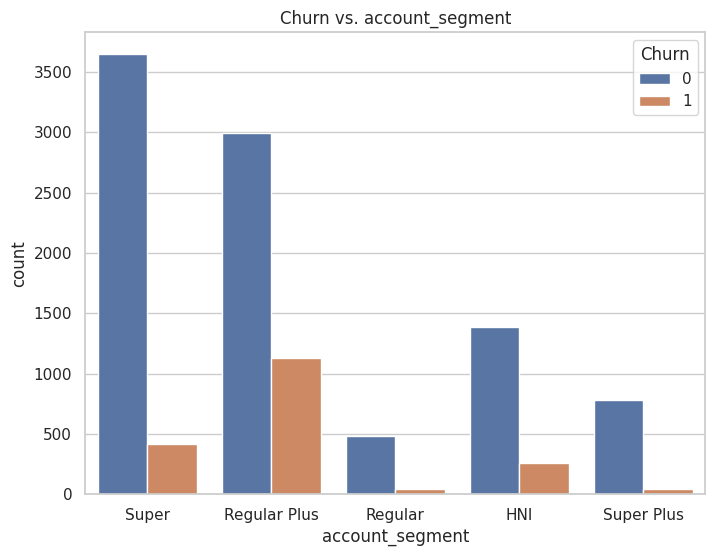

In [34]:
categorical_vars = ['Payment', 'Gender', 'Login_device', 'Marital_Status', 'account_segment']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var, hue='Churn')
    plt.title(f'Churn vs. {var}')
    plt.show()

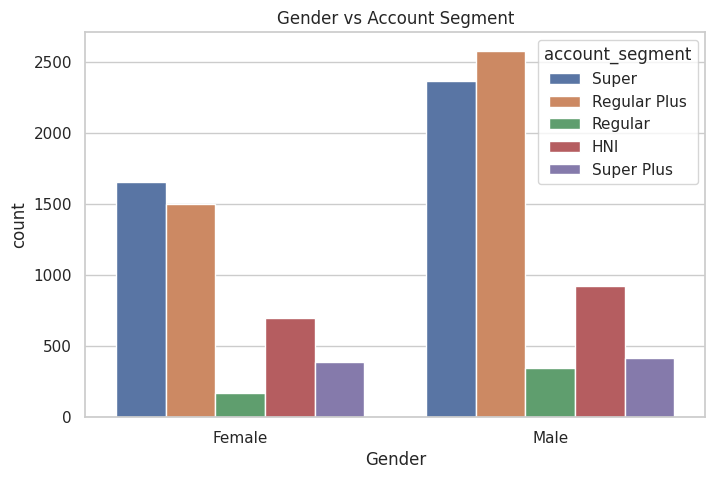

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Gender', hue='account_segment')
plt.title('Gender vs Account Segment')
plt.show()

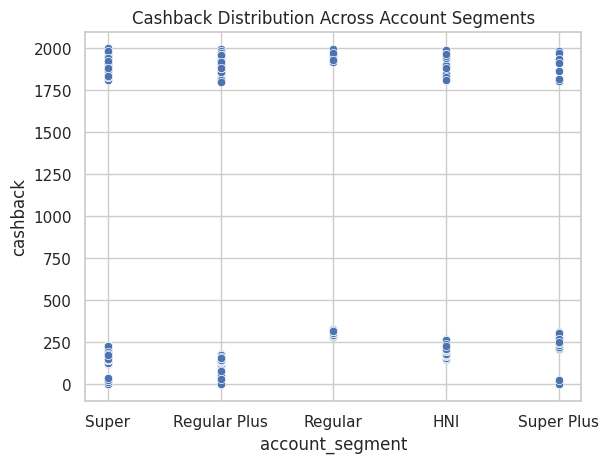

In [36]:
sns.scatterplot(data=df, x='account_segment', y='cashback')
plt.title('Cashback Distribution Across Account Segments')
plt.show()

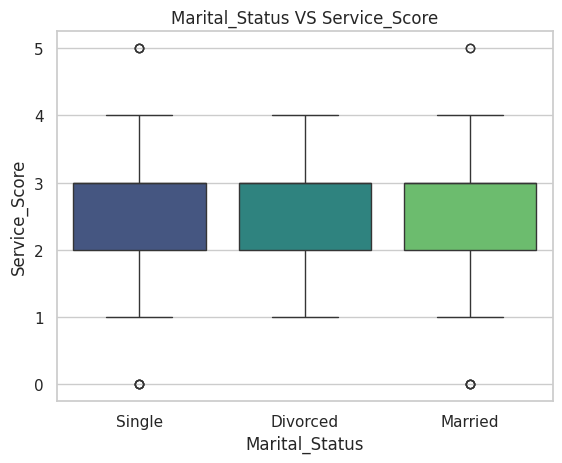

In [37]:
sns.boxplot(data=df, x='Marital_Status', y='Service_Score', palette='viridis')
plt.title('Marital_Status VS Service_Score')
plt.show()

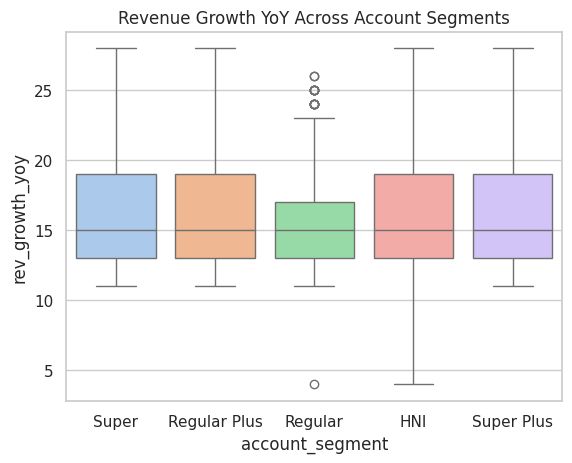

In [38]:
sns.boxplot(data=df, x='account_segment', y='rev_growth_yoy', palette="pastel")
plt.title('Revenue Growth YoY Across Account Segments')
plt.show()

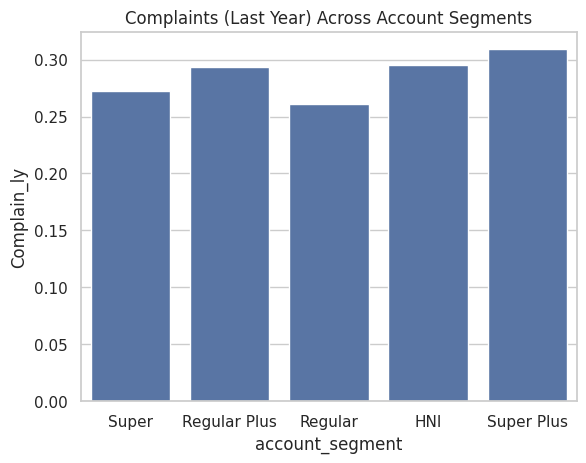

In [39]:
sns.barplot(data=df, x='account_segment', y='Complain_ly', ci=None)
plt.title('Complaints (Last Year) Across Account Segments')
plt.show()

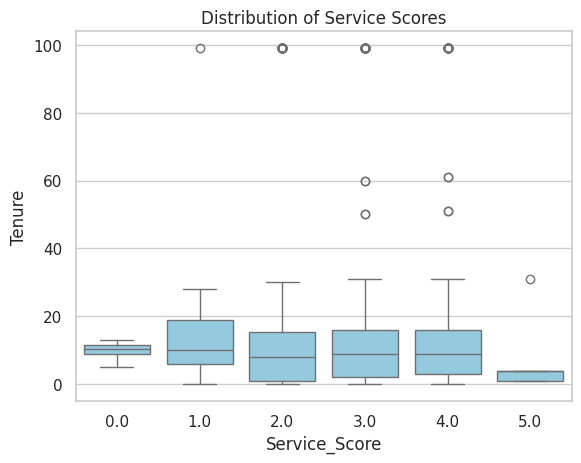

In [40]:
sns.boxplot(data=df, x='Service_Score', y='Tenure', color='skyblue')
plt.title('Distribution of Service Scores')
plt.show()

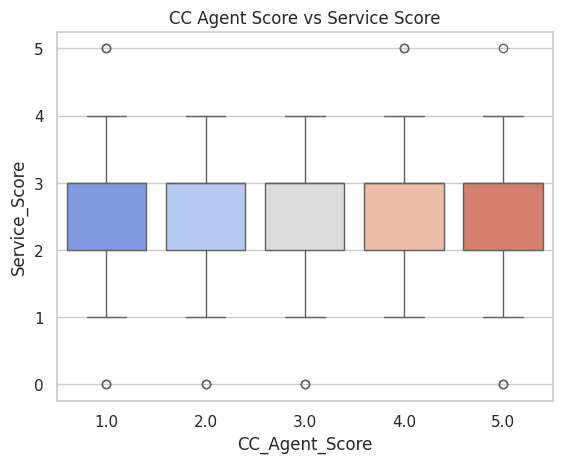

In [41]:
sns.boxplot(data=df, x='CC_Agent_Score', y='Service_Score', palette='coolwarm')
plt.title('CC Agent Score vs Service Score')
plt.show()

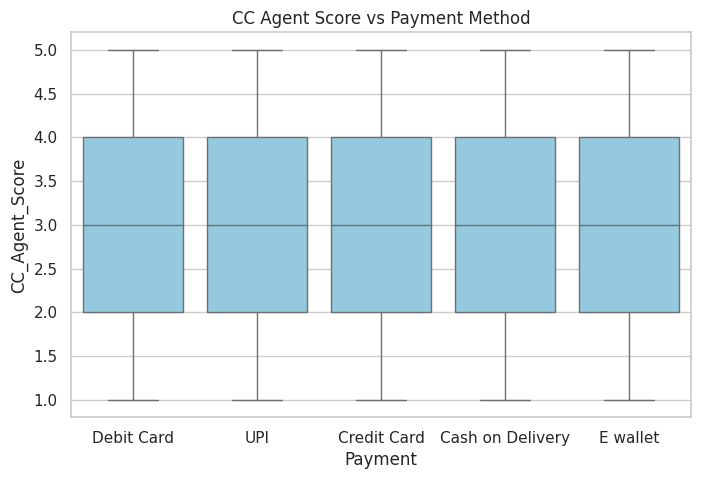

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='CC_Agent_Score', x='Payment', color='skyblue')
plt.title('CC Agent Score vs Payment Method')
plt.show()

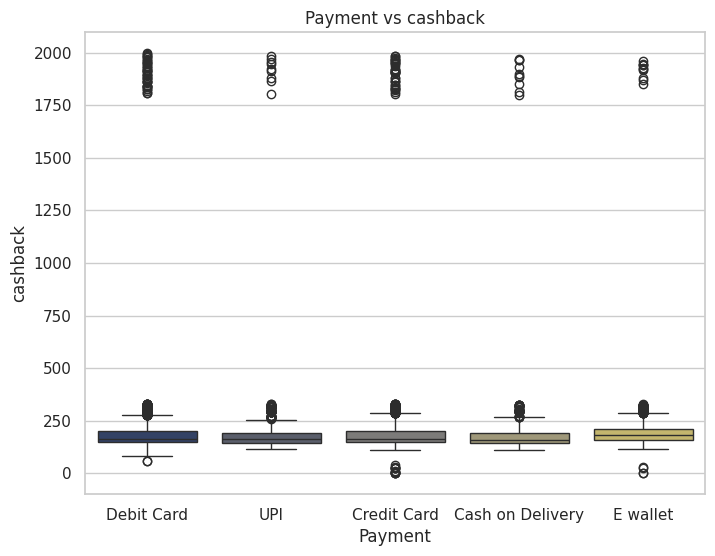

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='cashback', x='Payment', palette='cividis')
plt.title('Payment vs cashback')
plt.show()

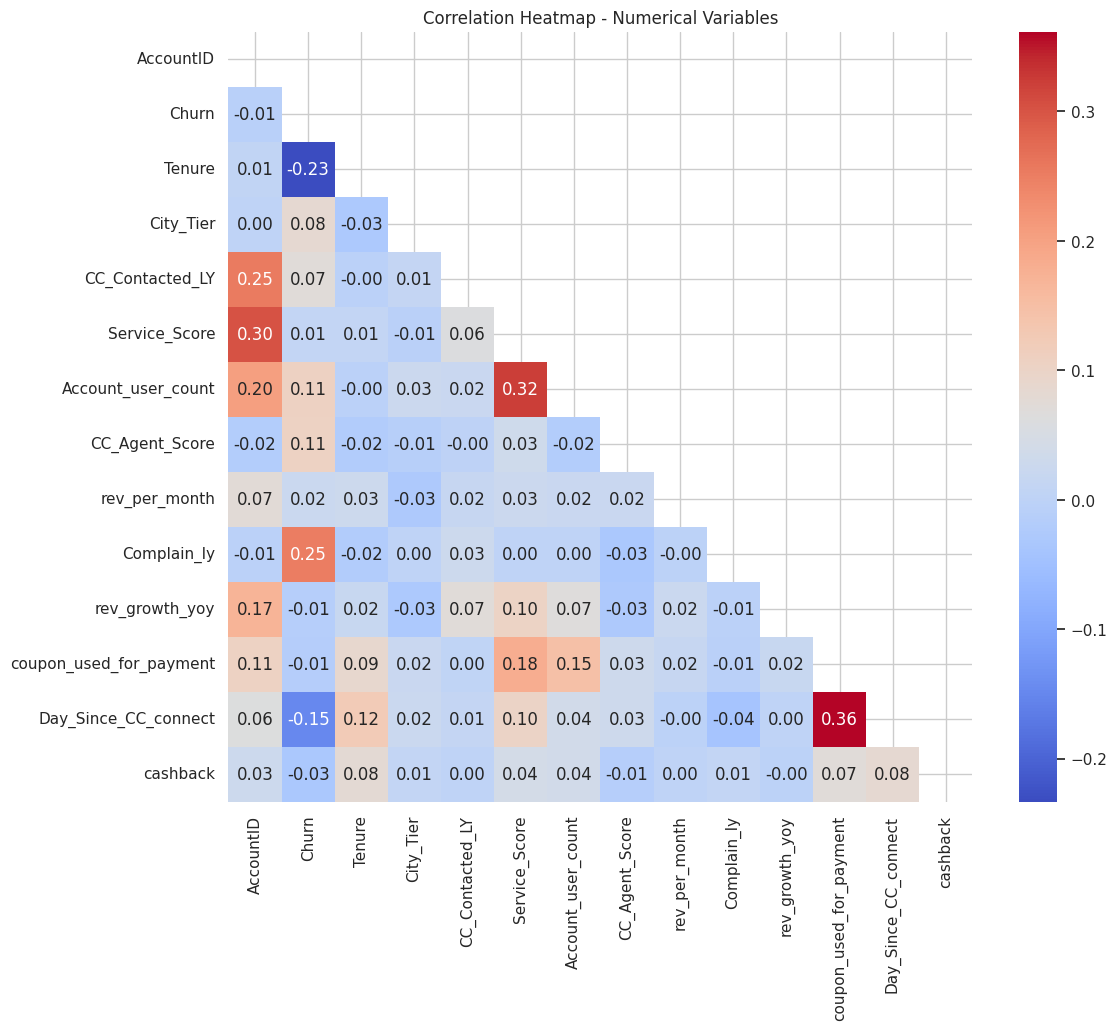

In [44]:
plt.figure(figsize=(12,10))
numerical_df = df.select_dtypes(include=['int64','float64'])
correlation_matrix = numerical_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, mask=mask, fmt='.2f', cmap='coolwarm')

plt.title('Correlation Heatmap - Numerical Variables')
plt.show()

### **Removal of Unwanted Variables**

In [10]:
data=df.copy()

In [11]:
data.drop('AccountID', axis = 1, inplace = True)

### **Missing Value Treatment**

In [12]:
data.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [48]:
print('Total size of the data:', data.size)
print('Size of the Missing values:', data.isnull().sum().sum())

Total size of the data: 202680
Size of the Missing values: 4361


In [49]:
4361/202680

0.021516676534438523

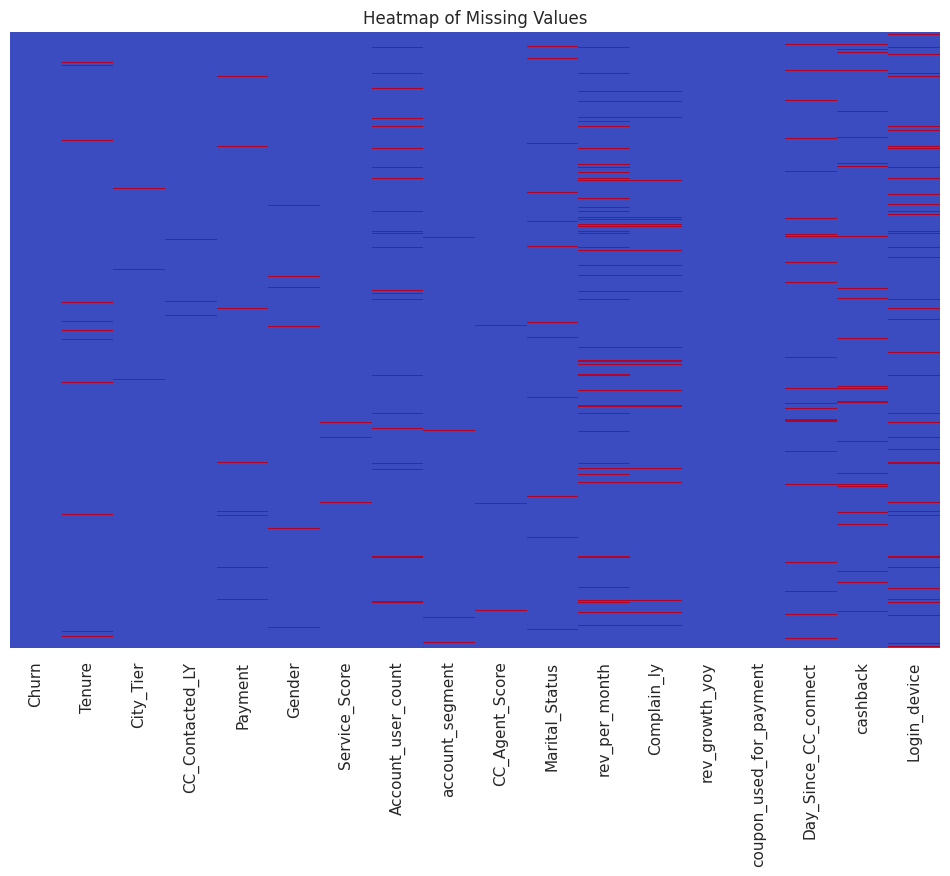

In [50]:
plt.figure(figsize = (12,8))
sns.heatmap(data.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.title('Heatmap of Missing Values')
plt.show()

In [12]:
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)
data['rev_per_month'].fillna(data['rev_per_month'].median(), inplace=True)
data['rev_growth_yoy'].fillna(data['rev_growth_yoy'].median(), inplace=True)
data['Day_Since_CC_connect'].fillna(data['Day_Since_CC_connect'].median(), inplace=True)
data['Account_user_count'].fillna(data['Account_user_count'].median(), inplace=True)
data['coupon_used_for_payment'].fillna(data['coupon_used_for_payment'].median(), inplace=True)
data['cashback'].fillna(data['cashback'].median(), inplace=True)
data['City_Tier'].fillna(data['City_Tier'].median(), inplace=True)
data['CC_Contacted_LY'].fillna(data['CC_Contacted_LY'].median(), inplace=True)
data['Payment'].fillna(data['Payment'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['account_segment'].fillna(data['account_segment'].mode()[0], inplace=True)
data['Marital_Status'].fillna(data['Marital_Status'].mode()[0], inplace=True)
data['Login_device'].fillna(data['Login_device'].mode()[0], inplace=True)
data['Service_Score'].fillna(data['Service_Score'].median(), inplace=True)
data['CC_Agent_Score'].fillna(data['CC_Agent_Score'].median(), inplace=True)
data['Complain_ly'].fillna(data['Complain_ly'].median(), inplace=True)

In [13]:
data.isnull().sum().sum()

0

### **Outlier Treatment**

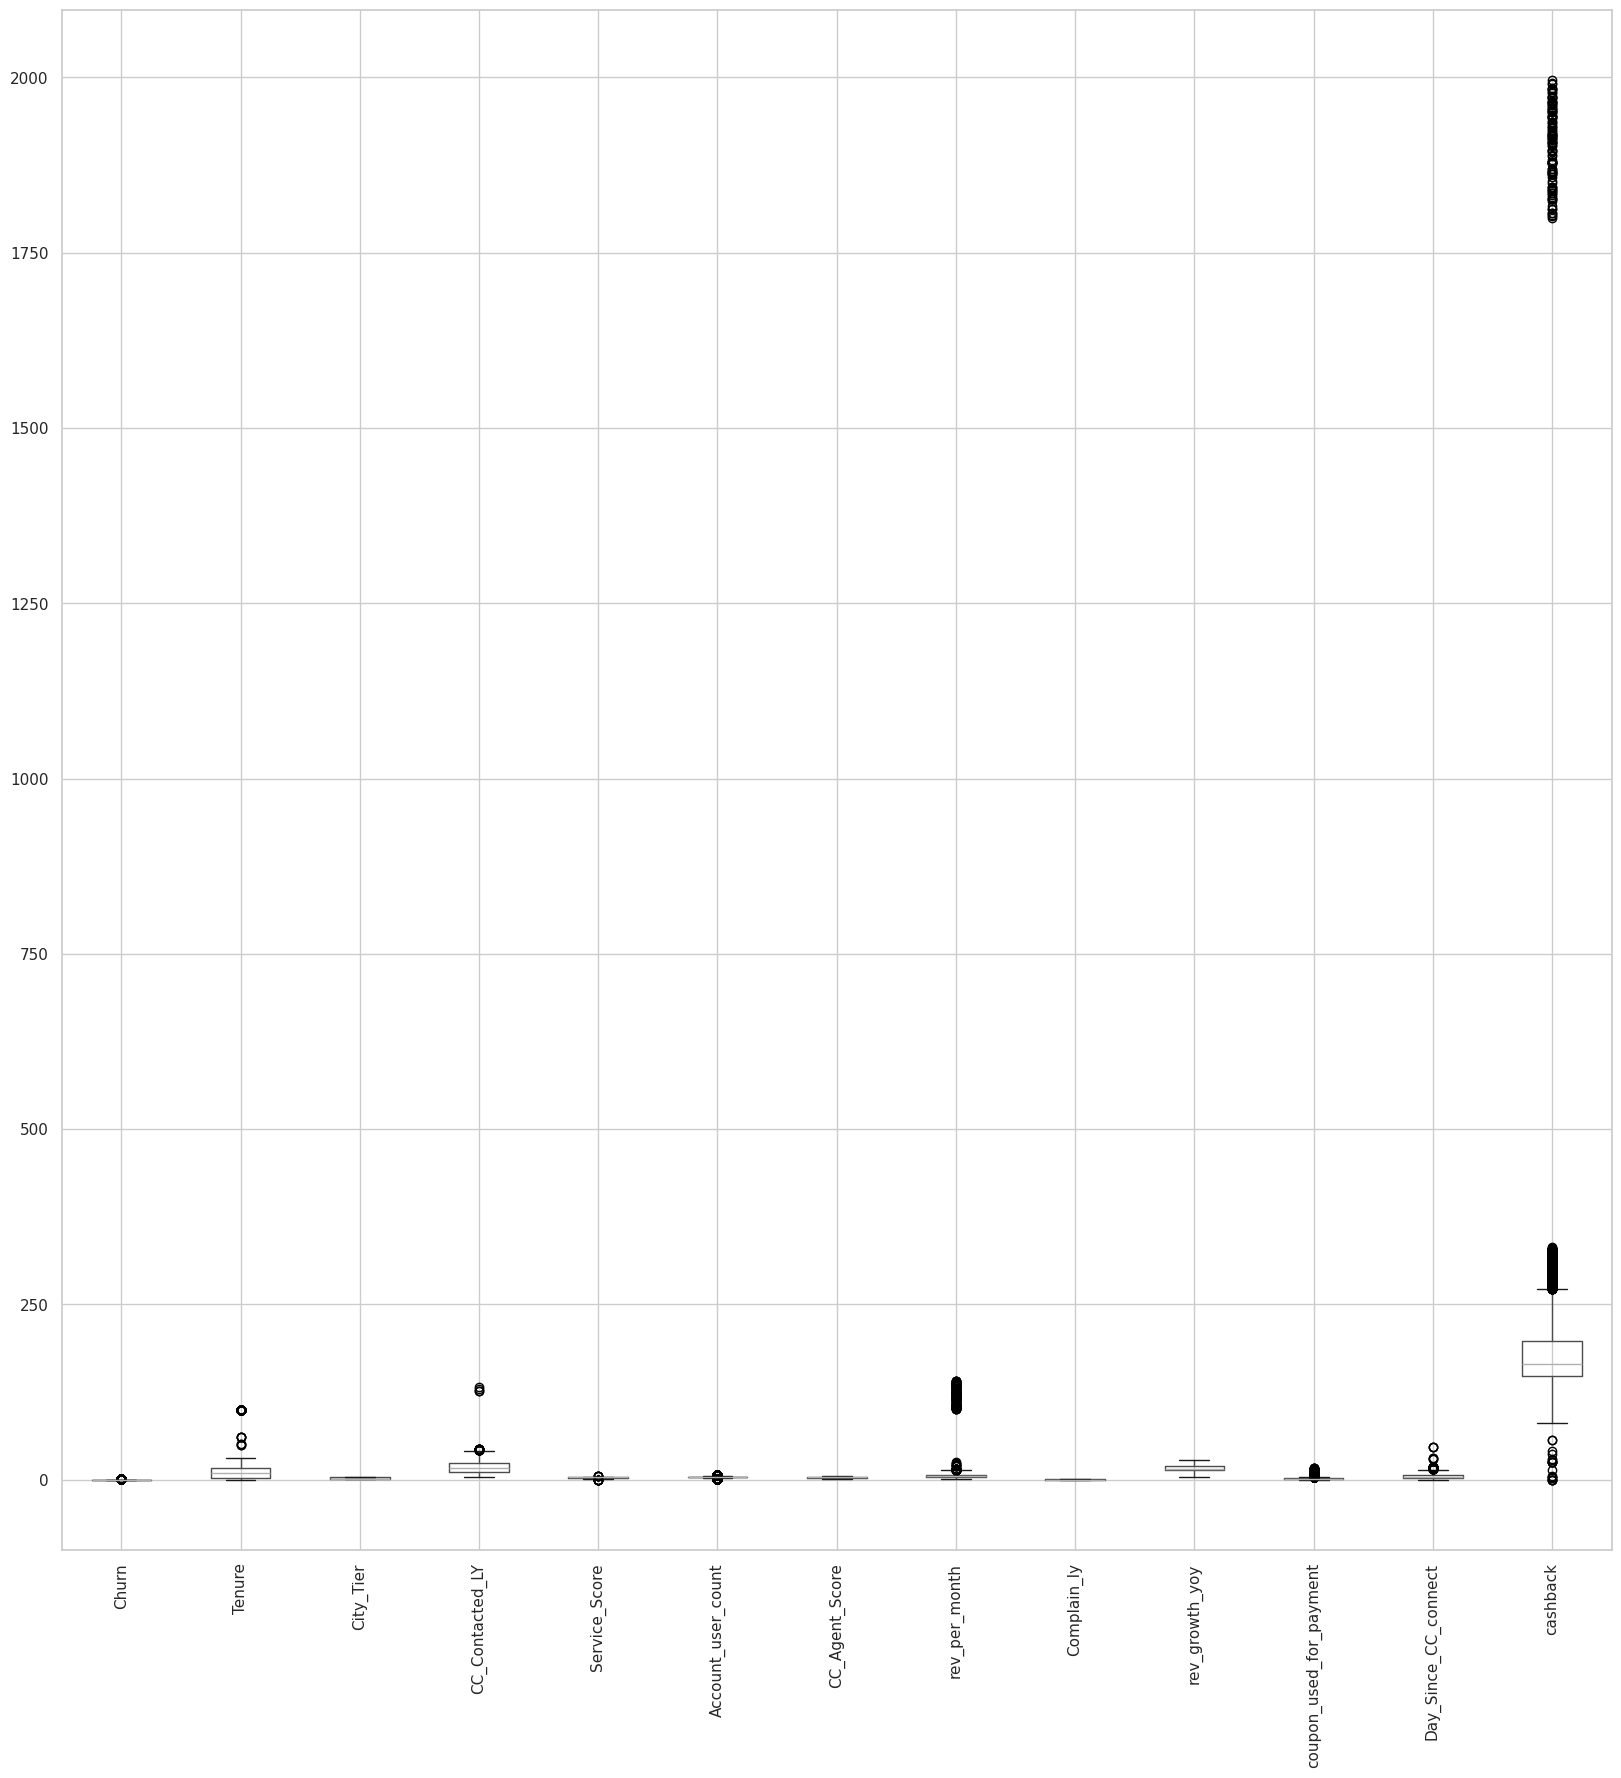

In [14]:
df_num = data.select_dtypes(include=["float64", "int64"])

df_num.boxplot(figsize=(20, 20))
plt.xticks(rotation=90)
plt.show()

In [15]:
df_outlier = data.copy()

In [16]:
numerical_columns = df_outlier.select_dtypes(include=['float64', 'int64']).columns

Q1 = df_outlier[numerical_columns].quantile(0.25)
Q3 = df_outlier[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
UL = df_outlier[numerical_columns].quantile(0.99)
LL = df_outlier[numerical_columns].quantile(0.01)

In [17]:
((df_outlier[numerical_columns] > UL) | (df_outlier[numerical_columns] < LL)).sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY             80
Service_Score               90
Account_user_count           0
CC_Agent_Score               0
rev_per_month              113
Complain_ly                  0
rev_growth_yoy              52
coupon_used_for_payment     98
Day_Since_CC_connect        93
cashback                   225
dtype: int64

In [18]:
((df_outlier[numerical_columns] > UL) | (df_outlier[numerical_columns] < LL)).sum().sum()

751

In [18]:
for col in numerical_columns:
    df_outlier[col] = df_outlier[col].clip(lower=LL[col], upper=UL[col])

In [19]:
((df_outlier[numerical_columns] > UL) | (df_outlier[numerical_columns] < LL)).sum().sum()

0

### **Variable Transformation**

#### **Encoding**

In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [21]:
df_encoded=pd.get_dummies(df_outlier, columns=['Payment', 'Marital_Status'], drop_first=True)

In [22]:
le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])
df_encoded['Login_device'] = le.fit_transform(df_encoded['Login_device'])
df_encoded['account_segment'] = le.fit_transform(df_encoded['account_segment'])

In [23]:
bool_columns = ['Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet', 'Payment_UPI',
                'Marital_Status_Married', 'Marital_Status_Single']
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

In [24]:
column_mapping = {
    'Payment_Credit Card': 'Payment_Credit_Card',
    'Payment_Debit Card': 'Payment_Debit_Card',
    'Payment_E wallet': 'Payment_E_wallet',
}
df_encoded = df_encoded.rename(columns=column_mapping)

In [25]:
df_encoded.head(5).T

0      1       2       3      4
Churn                      1.00    1.0    1.00    1.00    1.0
Tenure                     4.00    0.0    0.00    0.00    0.0
City_Tier                  3.00    1.0    1.00    3.00    1.0
CC_Contacted_LY            6.00    8.0   30.00   15.00   12.0
Gender                     0.00    1.0    1.00    1.00    1.0
Service_Score              3.00    3.0    2.00    2.00    2.0
Account_user_count         3.00    4.0    4.00    4.00    3.0
account_segment            3.00    2.0    2.00    3.00    2.0
CC_Agent_Score             2.00    3.0    3.00    5.00    5.0
rev_per_month              9.00    7.0    6.00    8.00    3.0
Complain_ly                1.00    1.0    1.00    0.00    0.0
rev_growth_yoy            11.00   15.0   14.00   23.00   11.0
coupon_used_for_payment    1.00    0.0    0.00    0.00    1.0
Day_Since_CC_connect       5.00    0.0    3.00    3.00    3.0
cashback                 159.93  120.9  165.25  134.07  129.6
Login_device               1.00    1.0    1.00    1.00    1.0
Payment_Credit_Card        0.00    0.0    0.00    0.00    1.0
Payment_Debit_Card         1.00    0.0    1.00    1.00    0.0
Payment_E_wallet           0.00    0.0    0.00    0.00    0.0
Payment_UPI                0.00    1.0    0.00    0.00    0.0
Marital_Status_Married     0.00    0.0    0.00    0.00    0.0
Marital_Status_Single      1.00    1.0    1.00    1.00    1.0

#### **Scaling**

In [26]:
df_scaled = df_encoded.drop('Churn', axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.drop('Churn', axis=1).columns)

In [27]:
df_scaled.head().T

0         1         2         3         4
Tenure                  -0.547613 -0.861167 -0.861167 -0.861167 -0.861167
City_Tier                1.481914 -0.709334 -0.709334  1.481914 -0.709334
CC_Contacted_LY         -1.381926 -1.147891  1.426488 -0.328771 -0.679822
Gender                  -1.237528  0.808063  0.808063  0.808063  0.808063
Service_Score            0.126122  0.126122 -1.294008 -1.294008 -1.294008
Account_user_count      -0.701928  0.293752  0.293752  0.293752 -0.701928
account_segment          0.743123 -0.150848 -0.150848  0.743123 -0.150848
CC_Agent_Score          -0.776488 -0.047944 -0.047944  1.409143  1.409143
rev_per_month            1.225661  0.563883  0.232994  0.894772 -0.759673
Complain_ly              1.618461  1.618461  1.618461 -0.617871 -0.617871
rev_growth_yoy          -1.388619 -0.318257 -0.585847  1.822467 -1.388619
coupon_used_for_payment -0.413510 -0.951168 -0.951168 -0.951168 -0.413510
Day_Since_CC_connect     0.127618 -1.296821 -0.442158 -0.442158 -0.442158
cashback                -0.404267 -1.188414 -0.297384 -0.923817 -1.013624
Login_device             0.605123  0.605123  0.605123  0.605123  0.605123
Payment_Credit_Card     -0.673120 -0.673120 -0.673120 -0.673120  1.485619
Payment_Debit_Card       1.182280 -0.845824  1.182280  1.182280 -0.845824
Payment_E_wallet        -0.348108 -0.348108 -0.348108 -0.348108 -0.348108
Payment_UPI             -0.280626  3.563467 -0.280626 -0.280626 -0.280626
Marital_Status_Married  -1.081847 -1.081847 -1.081847 -1.081847 -1.081847
Marital_Status_Single    1.482857  1.482857  1.482857  1.482857  1.482857

## **Business Insights from EDA**

### **Any business insights using clustering**

In [28]:
from sklearn.cluster import KMeans

In [29]:
k_means_df = df_scaled.copy()

In [30]:
wss = []

a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

sil_score = []

for i in a:
    KM = KMeans(n_clusters=i, random_state=42)
    KM.fit(k_means_df)
    wss.append(KM.inertia_)

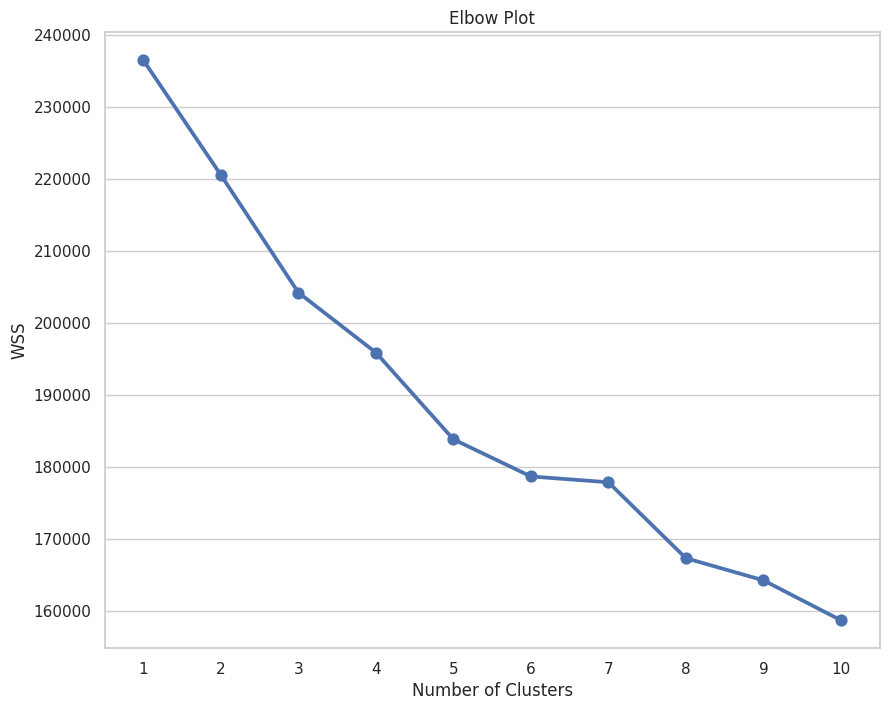

In [31]:
plt.figure(figsize=(10, 8))
sns.pointplot(x=a, y=wss)
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [32]:
from sklearn.metrics import silhouette_score

ss = {1: 0}

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i, init="k-means++", random_state=42)
    y = clusterer.fit_predict(k_means_df)
    s = silhouette_score(k_means_df, y)
    ss[i] = round(s, 5)
    print("The Average Silhouette Score for {} clusters is {}".format(i, round(s, 5)))

The Average Silhouette Score for 2 clusters is 0.07351
The Average Silhouette Score for 3 clusters is 0.09828
The Average Silhouette Score for 4 clusters is 0.09244
The Average Silhouette Score for 5 clusters is 0.10465
The Average Silhouette Score for 6 clusters is 0.09119
The Average Silhouette Score for 7 clusters is 0.0842
The Average Silhouette Score for 8 clusters is 0.09373
The Average Silhouette Score for 9 clusters is 0.09505
The Average Silhouette Score for 10 clusters is 0.10006


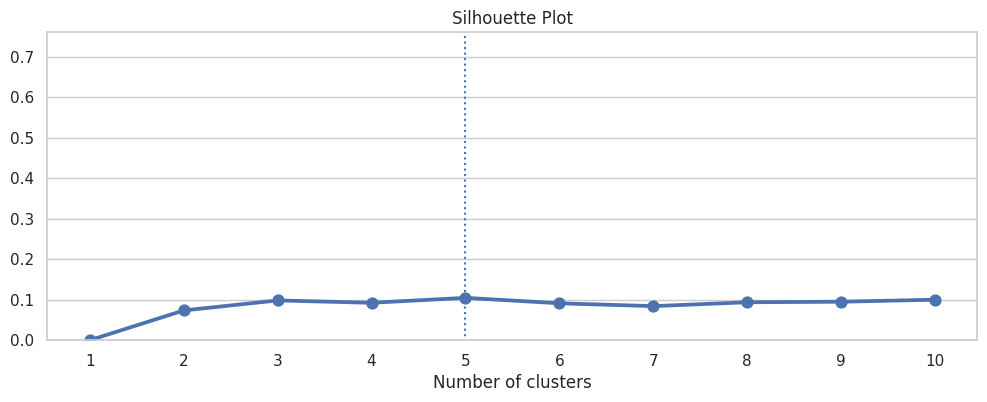

In [33]:
maxkey = [key for key, value in ss.items() if value == max(ss.values())][0]

fig, ax = plt.subplots(figsize=(12, 4))
sns.pointplot(x=list(ss.keys()), y=list(ss.values()))
plt.vlines(x=maxkey - 1, ymax=0, ymin=0.75, linestyles="dotted")
ax.set(ylim=(0, 0.76))
ax.set_title("Silhouette Plot")
ax.set_xlabel("Number of clusters");

In [34]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=1)

kmeans.fit_predict(k_means_df)

array([2, 0, 2, ..., 2, 3, 3], dtype=int32)

In [35]:
df2 = df_encoded.copy()
df_ori = df.copy()

k_means_df["K_means_segments"] = kmeans.labels_
df2["K_means_segments"] = kmeans.labels_
df_ori["K_means_segments"] = kmeans.labels_

In [36]:
k_means_df.head().T

0         1         2         3         4
Tenure                  -0.547613 -0.861167 -0.861167 -0.861167 -0.861167
City_Tier                1.481914 -0.709334 -0.709334  1.481914 -0.709334
CC_Contacted_LY         -1.381926 -1.147891  1.426488 -0.328771 -0.679822
Gender                  -1.237528  0.808063  0.808063  0.808063  0.808063
Service_Score            0.126122  0.126122 -1.294008 -1.294008 -1.294008
Account_user_count      -0.701928  0.293752  0.293752  0.293752 -0.701928
account_segment          0.743123 -0.150848 -0.150848  0.743123 -0.150848
CC_Agent_Score          -0.776488 -0.047944 -0.047944  1.409143  1.409143
rev_per_month            1.225661  0.563883  0.232994  0.894772 -0.759673
Complain_ly              1.618461  1.618461  1.618461 -0.617871 -0.617871
rev_growth_yoy          -1.388619 -0.318257 -0.585847  1.822467 -1.388619
coupon_used_for_payment -0.413510 -0.951168 -0.951168 -0.951168 -0.413510
Day_Since_CC_connect     0.127618 -1.296821 -0.442158 -0.442158 -0.442158
cashback                -0.404267 -1.188414 -0.297384 -0.923817 -1.013624
Login_device             0.605123  0.605123  0.605123  0.605123  0.605123
Payment_Credit_Card     -0.673120 -0.673120 -0.673120 -0.673120  1.485619
Payment_Debit_Card       1.182280 -0.845824  1.182280  1.182280 -0.845824
Payment_E_wallet        -0.348108 -0.348108 -0.348108 -0.348108 -0.348108
Payment_UPI             -0.280626  3.563467 -0.280626 -0.280626 -0.280626
Marital_Status_Married  -1.081847 -1.081847 -1.081847 -1.081847 -1.081847
Marital_Status_Single    1.482857  1.482857  1.482857  1.482857  1.482857
K_means_segments         2.000000  0.000000  2.000000  2.000000  3.000000

In [37]:
df_ori.head(5).T

0             1             2           3  \
AccountID                     20000         20001         20002       20003   
Churn                             1             1             1           1   
Tenure                          4.0           0.0           0.0         0.0   
City_Tier                       3.0           1.0           1.0         3.0   
CC_Contacted_LY                 6.0           8.0          30.0        15.0   
Payment                  Debit Card           UPI    Debit Card  Debit Card   
Gender                       Female          Male          Male        Male   
Service_Score                   3.0           3.0           2.0         2.0   
Account_user_count              3.0           4.0           4.0         4.0   
account_segment               Super  Regular Plus  Regular Plus       Super   
CC_Agent_Score                  2.0           3.0           3.0         5.0   
Marital_Status               Single        Single        Single      Single   
rev_per_month                   9.0           7.0           6.0         8.0   
Complain_ly                     1.0           1.0           1.0         0.0   
rev_growth_yoy                 11.0          15.0          14.0        23.0   
coupon_used_for_payment         1.0           0.0           0.0         0.0   
Day_Since_CC_connect            5.0           0.0           3.0         3.0   
cashback                     159.93         120.9           NaN      134.07   
Login_device                 Mobile        Mobile        Mobile      Mobile   
K_means_segments                  2             0             2           2   

                                    4  
AccountID                       20004  
Churn                               1  
Tenure                            0.0  
City_Tier                         1.0  
CC_Contacted_LY                  12.0  
Payment                   Credit Card  
Gender                           Male  
Service_Score                     2.0  
Account_user_count                3.0  
account_segment          Regular Plus  
CC_Agent_Score                    5.0  
Marital_Status                 Single  
rev_per_month                     3.0  
Complain_ly                       0.0  
rev_growth_yoy                   11.0  
coupon_used_for_payment           1.0  
Day_Since_CC_connect              3.0  
cashback                        129.6  
Login_device                   Mobile  
K_means_segments                    3

In [38]:
km_cluster_profile = df2.groupby("K_means_segments").mean()

In [39]:
km_cluster_profile["count_in_each_segment"] = (
    df2.groupby("K_means_segments")["Account_user_count"]
    .count()
    .values
)

In [40]:
KM_cluster = km_cluster_profile.T
display(KM_cluster.style.highlight_max(color="yellow", axis=1))

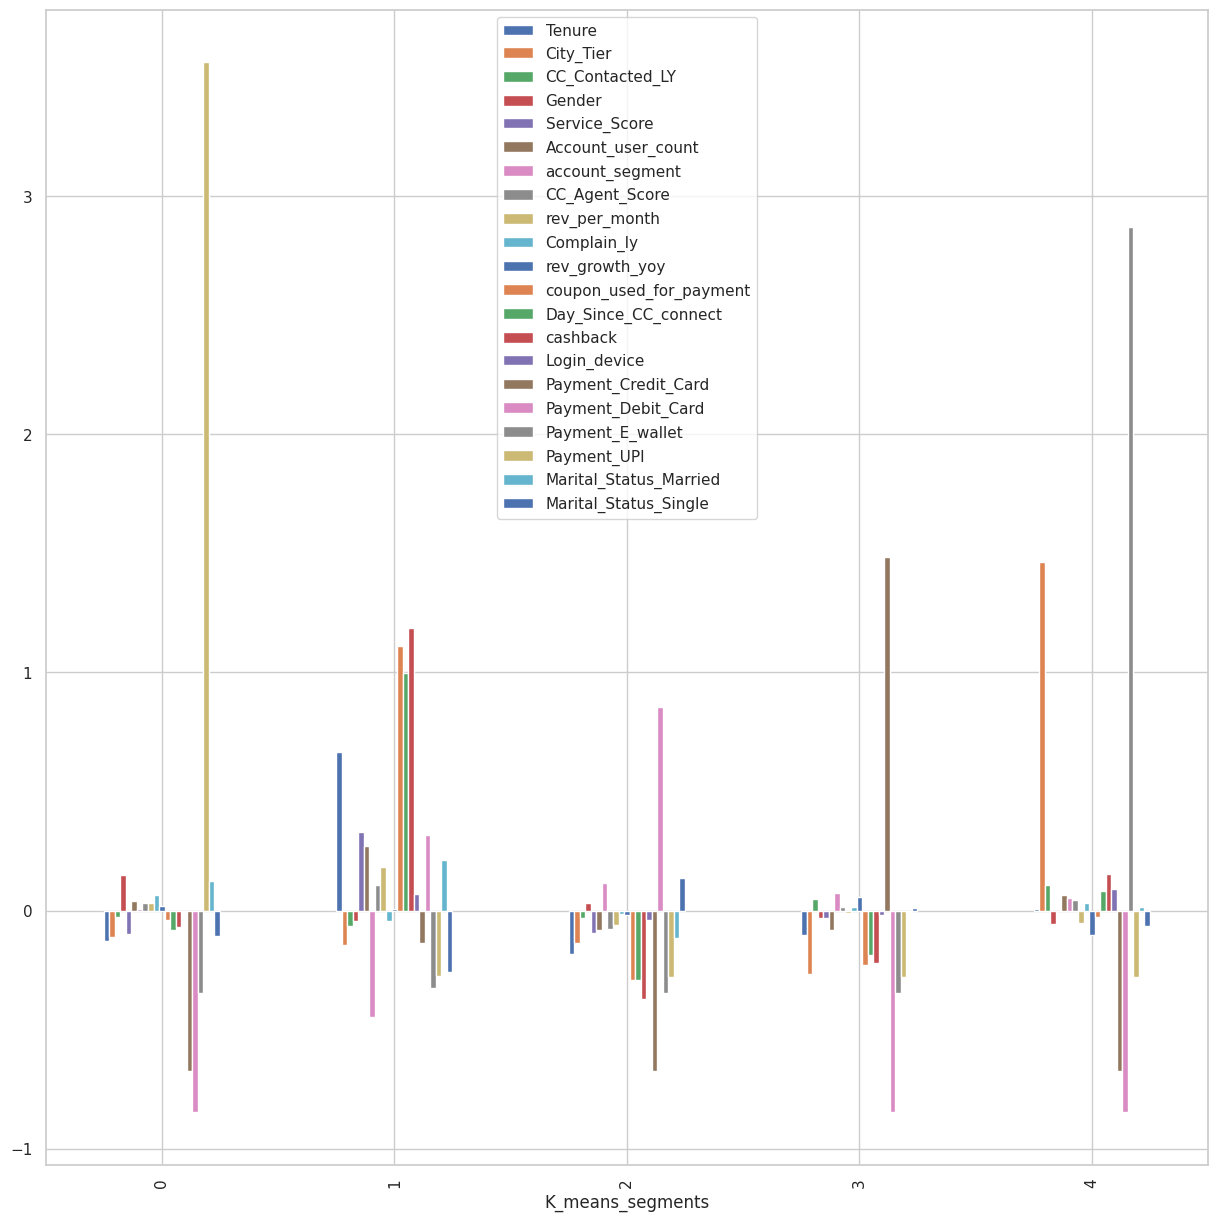

In [42]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 15))
plt.legend(loc="best");

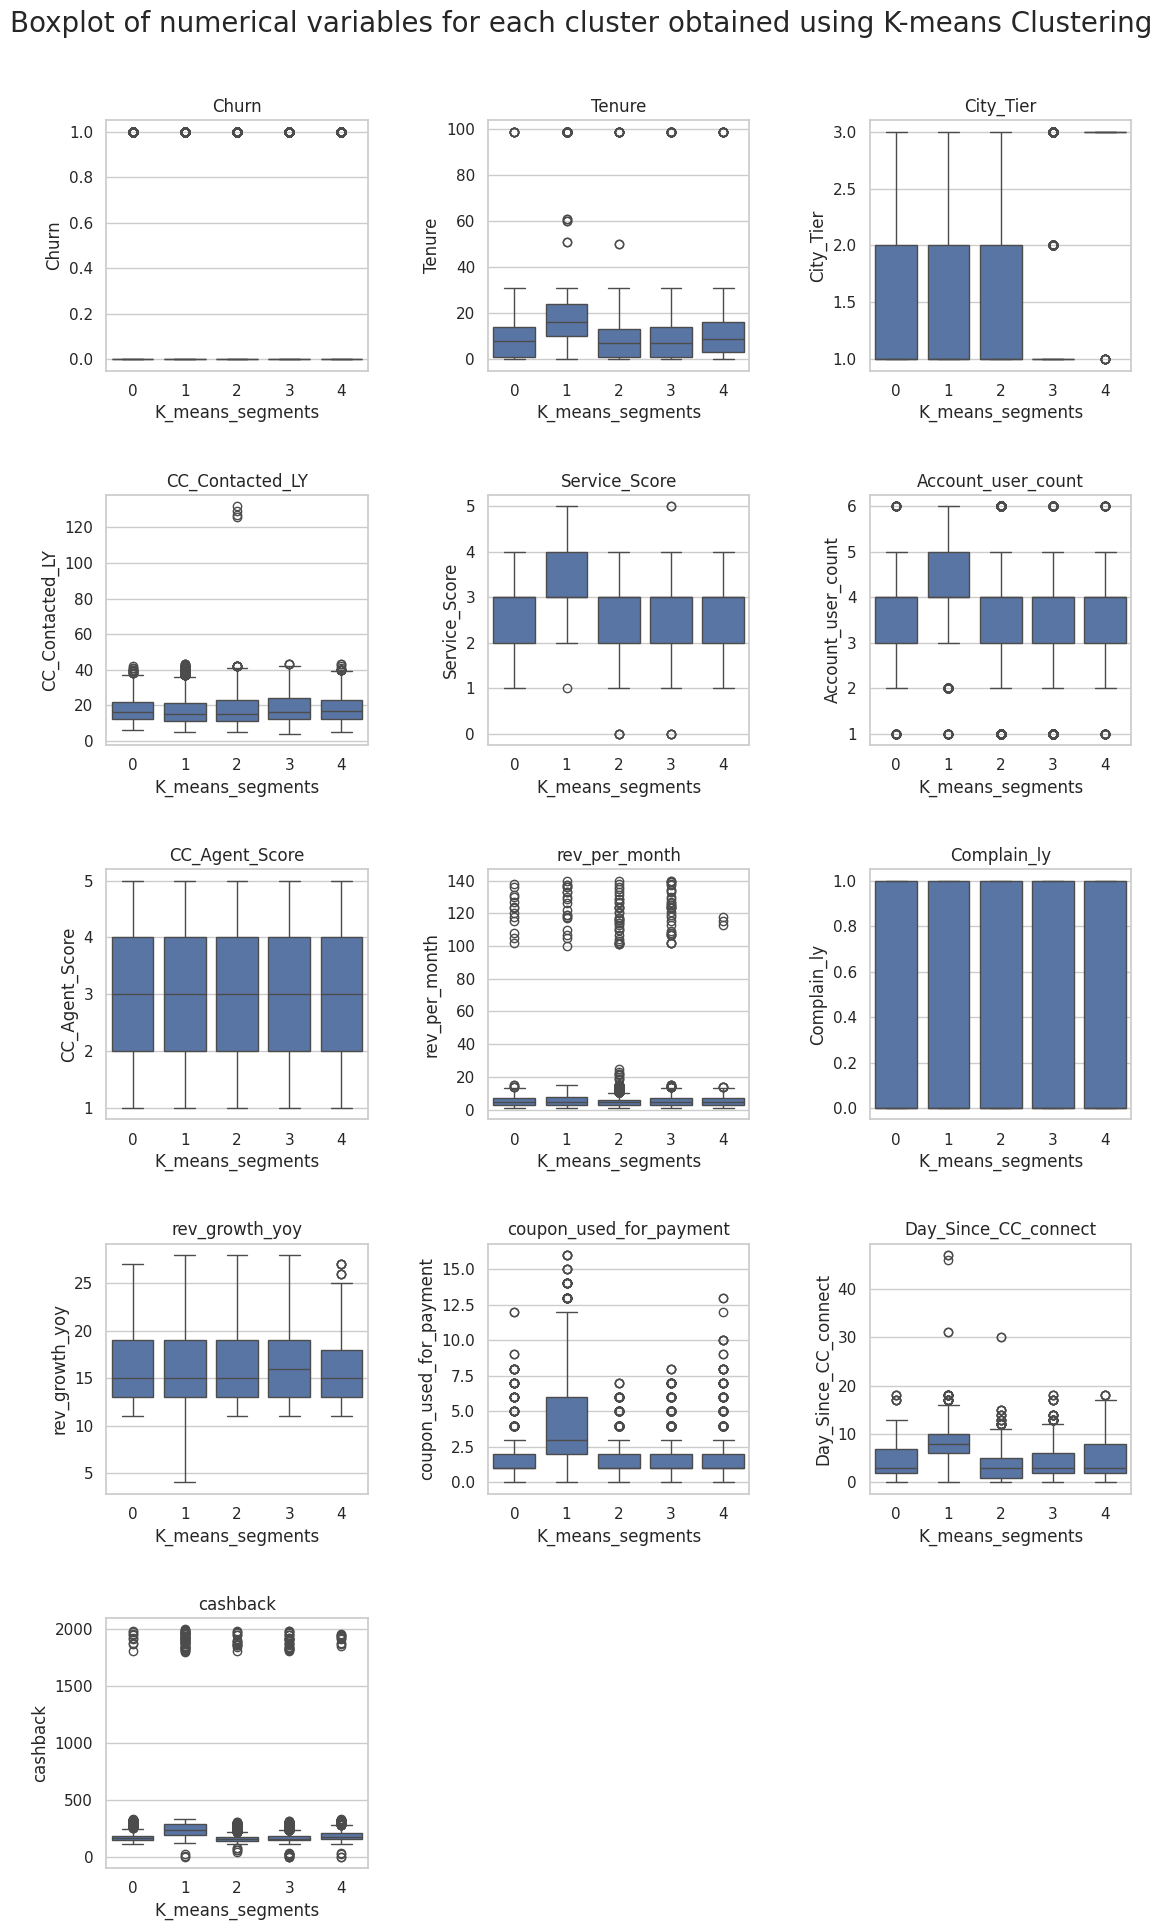

In [82]:
fig, axes = plt.subplots(5, 3, figsize=(12, 20))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using K-means Clustering",
    fontsize=20,
)

counter = 0

axes = axes.flatten()

for ii in range(13):
    sns.boxplot(
        ax=axes[ii], y=df_num[df_num.columns[counter]], x=k_means_df["K_means_segments"]
    )
    axes[ii].set_title(df_num.columns[counter])
    counter += 1

for jj in range(13, len(axes)):
    axes[jj].axis('off')

fig.tight_layout(pad=3.0)

## **Model building and interpretation**

In [42]:
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)
    recall = recall_score(target, y_pred)
    precision = precision_score(target, y_pred)
    f1 = f1_score(target, y_pred)

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [43]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### **Build various models**

In [44]:
X = df_scaled
y = df_encoded['Churn']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### **Logistic Regression**

In [46]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

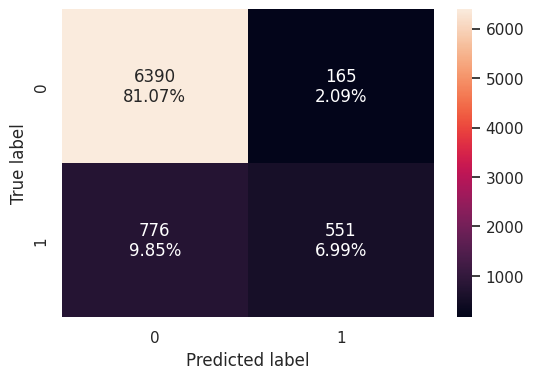

In [47]:
model_confusion_matrix(logreg, X_train, y_train)

In [48]:
lr_perf_train = model_performance_classification(logreg, X_train, y_train)
lr_perf_train

Accuracy    Recall  Precision        F1
0  0.880614  0.415222   0.769553  0.539403

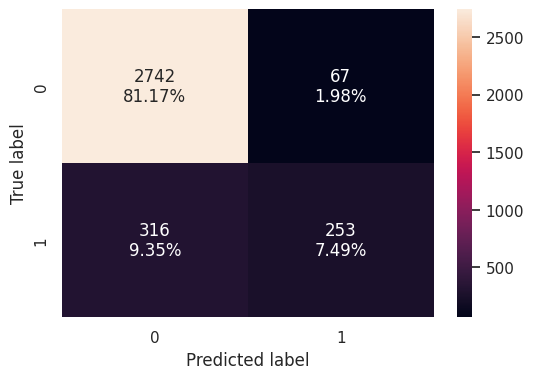

In [49]:
model_confusion_matrix(logreg, X_test, y_test)

In [50]:
lr_perf_test = model_performance_classification(logreg, X_test, y_test)
lr_perf_test

Accuracy   Recall  Precision        F1
0  0.886619  0.44464   0.790625  0.569179

Train AUC: 0.87


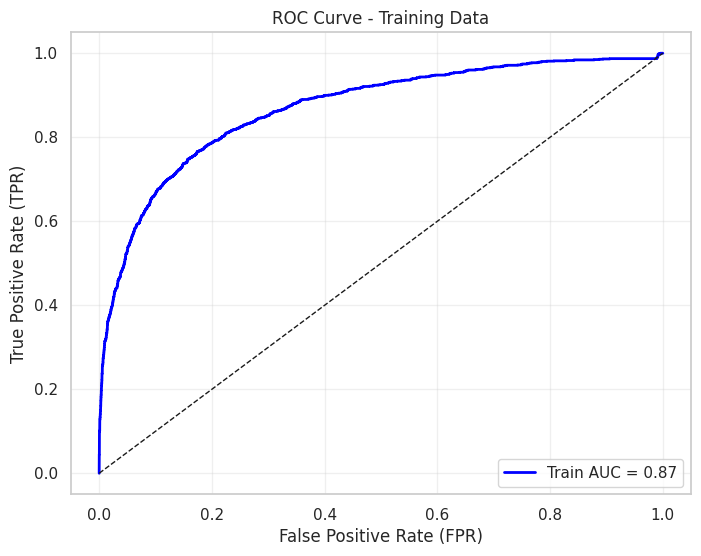

Test AUC: 0.87


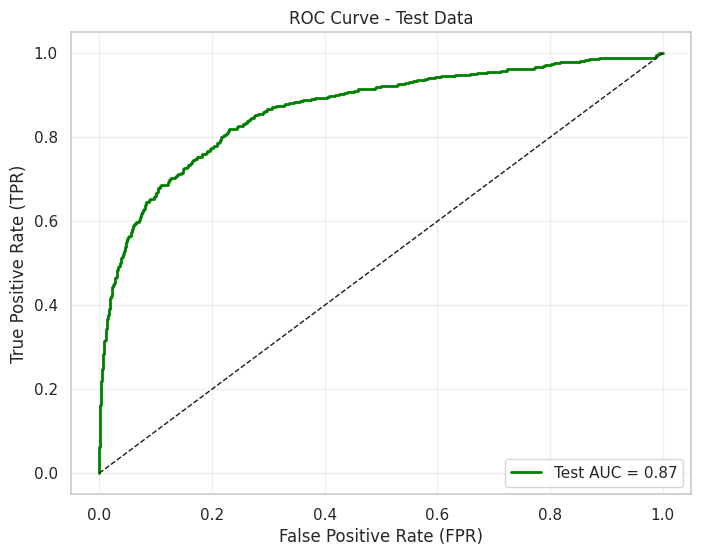

In [53]:
y_train_proba = logreg.predict_proba(X_train)[:, 1]
y_test_proba = logreg.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print(f"Train AUC: {roc_auc_train:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Test AUC: {roc_auc_test:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### **Logistic Regression Model on Resampled data**

In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

logreg_smote = LogisticRegression(max_iter=1000, random_state=42)
logreg_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

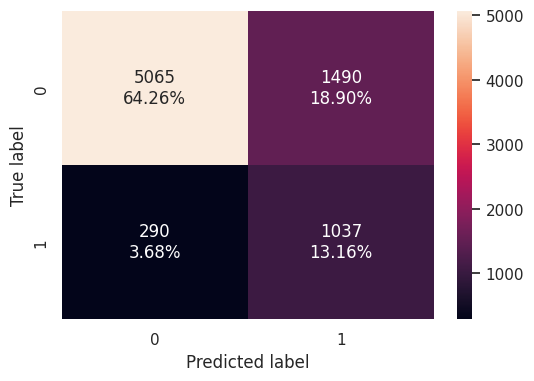

In [52]:
model_confusion_matrix(logreg_smote, X_train, y_train)

In [53]:
lr_train_smote = model_performance_classification(logreg_smote, X_train, y_train)
lr_train_smote

Accuracy    Recall  Precision        F1
0  0.774169  0.781462   0.410368  0.538142

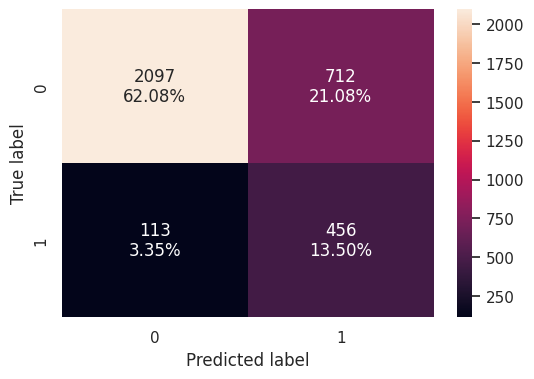

In [57]:
model_confusion_matrix(logreg_smote, X_test, y_test)

In [54]:
lr_test_smote = model_performance_classification(logreg_smote, X_test, y_test)
lr_test_smote

Accuracy    Recall  Precision        F1
0  0.755773  0.801406   0.390411  0.525043

Train AUC: 0.86


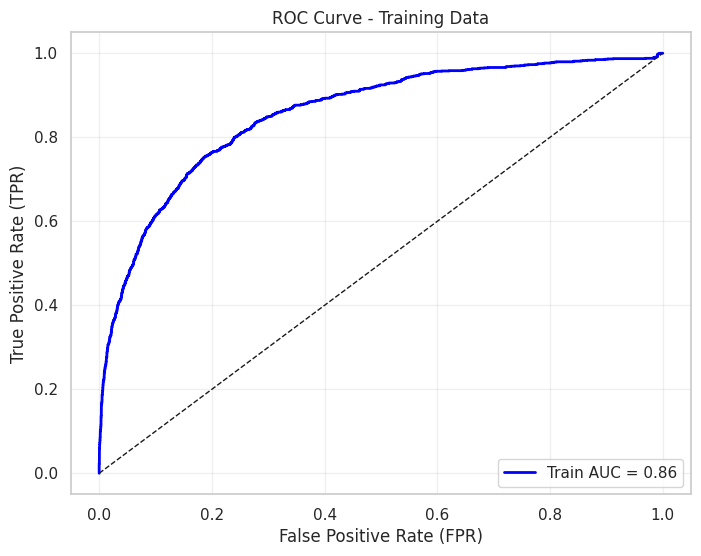

Test AUC: 0.85


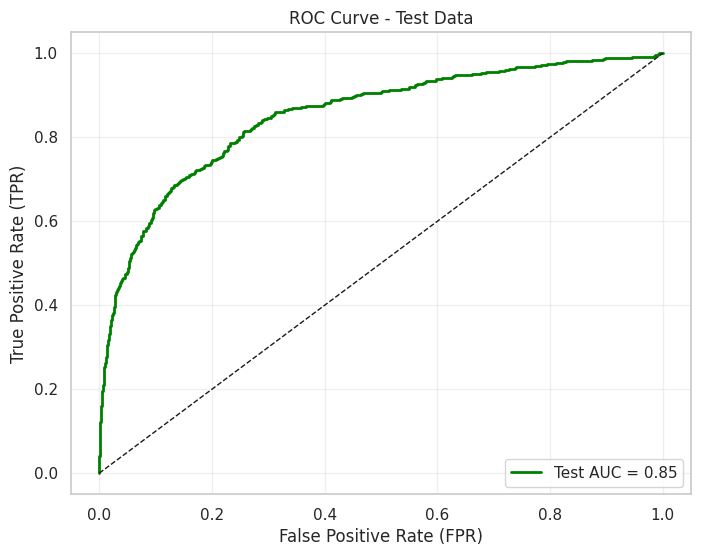

In [55]:
y_train_proba = logreg_smote.predict_proba(X_train)[:, 1]
y_test_proba = logreg_smote.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print(f"Train AUC: {roc_auc_train:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Test AUC: {roc_auc_test:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### **Linear Discriminant Analysis**

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_model=lda.fit(X_train, y_train)
lda_model

LinearDiscriminantAnalysis()

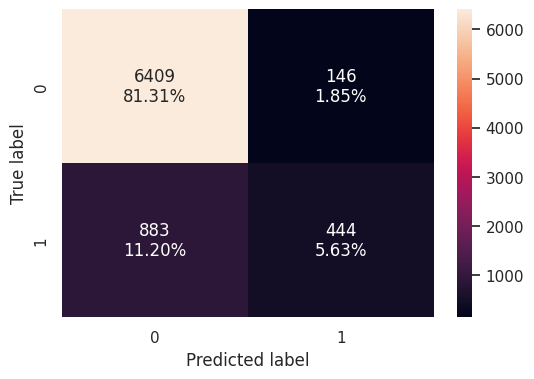

In [114]:
model_confusion_matrix(lda_model, X_train, y_train)

In [57]:
lda_perf_train = model_performance_classification(lda_model, X_train, y_train)
lda_perf_train

Accuracy    Recall  Precision        F1
0  0.869449  0.334589   0.752542  0.463224

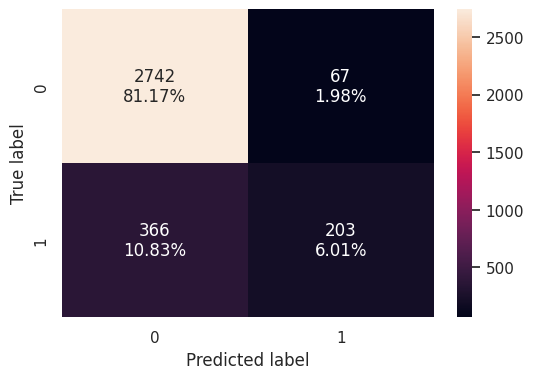

In [116]:
model_confusion_matrix(lda_model, X_test, y_test)

In [58]:
lda_perf_test = model_performance_classification(lda_model, X_test, y_test)
lda_perf_test

Accuracy    Recall  Precision        F1
0  0.871818  0.356766   0.751852  0.483909

Train AUC: 0.84


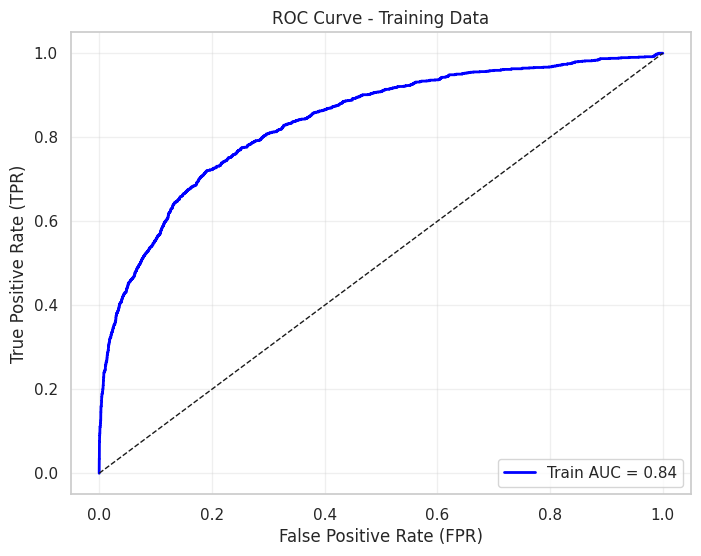

Test AUC: 0.84


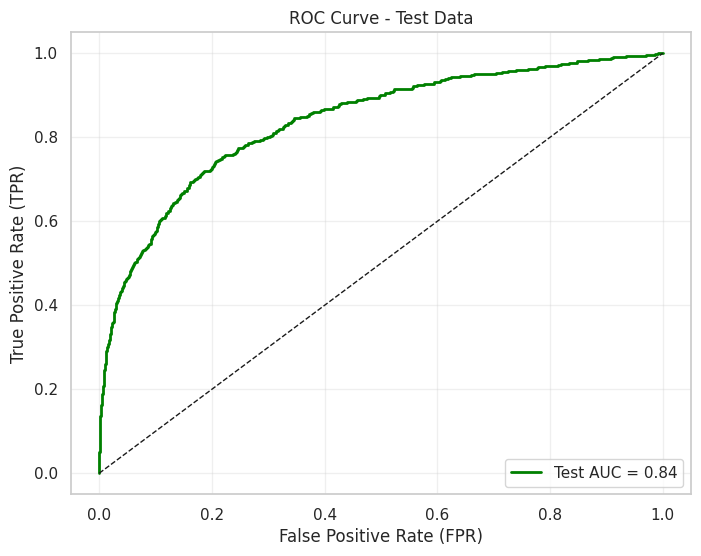

In [118]:
y_train_proba = lda_model.predict_proba(X_train)[:, 1]
y_test_proba = lda_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print(f"Train AUC: {roc_auc_train:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Test AUC: {roc_auc_test:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### **LDA Model on Resampled data**

In [59]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

lda = LinearDiscriminantAnalysis()
lda_resampled = lda.fit(X_resampled, y_resampled)

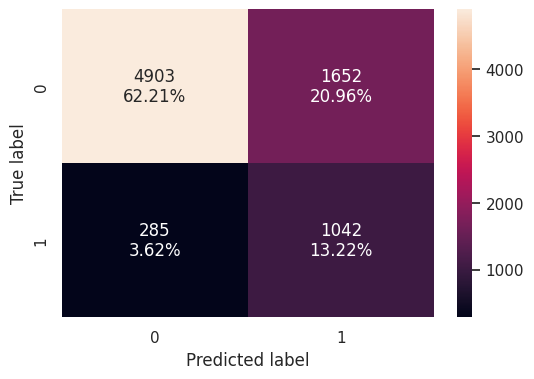

In [121]:
model_confusion_matrix(lda_resampled, X_train, y_train)

In [60]:
lda_smote_train = model_performance_classification(lda_resampled, X_train, y_train)
lda_smote_train

Accuracy   Recall  Precision        F1
0   0.75425  0.78523   0.386785  0.518279

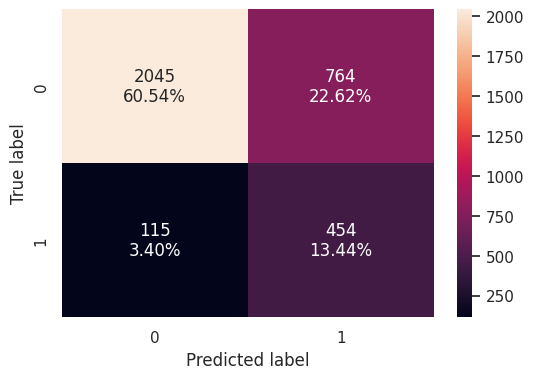

In [123]:
model_confusion_matrix(lda_resampled, X_test, y_test)

In [61]:
lda_smote_test = model_performance_classification(lda_resampled, X_test, y_test)
lda_smote_test

Accuracy    Recall  Precision        F1
0  0.739787  0.797891   0.372742  0.508114

Train AUC: 0.84


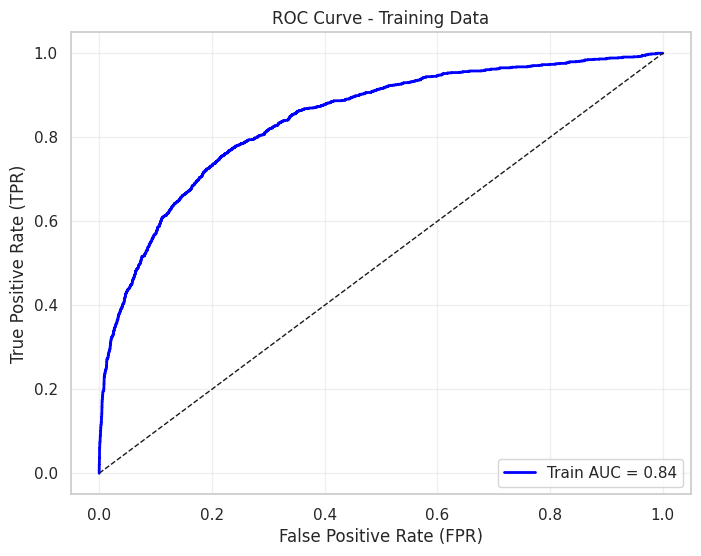

Test AUC: 0.84


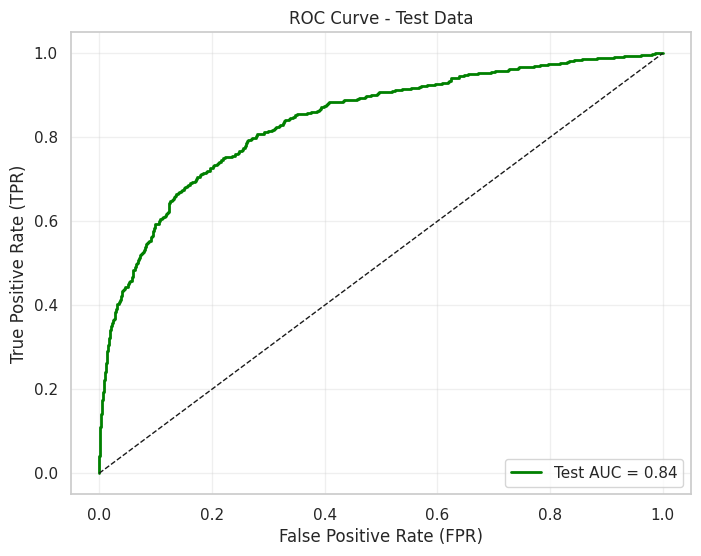

In [126]:
y_train_proba = lda_resampled.predict_proba(X_train)[:, 1]
y_test_proba = lda_resampled.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print(f"Train AUC: {roc_auc_train:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Test AUC: {roc_auc_test:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### **Decision Tree**

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

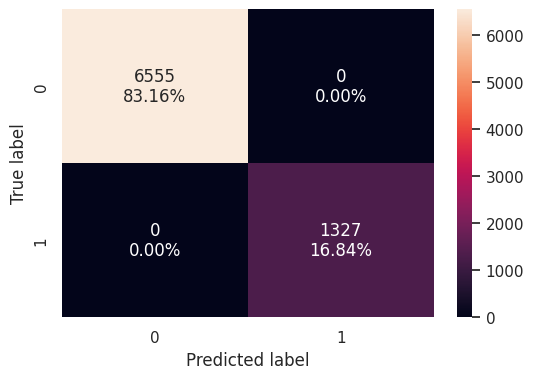

In [73]:
model_confusion_matrix(dt_classifier, X_train, y_train)

In [63]:
dt_perf_train = model_performance_classification(dt_classifier, X_train, y_train)
dt_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

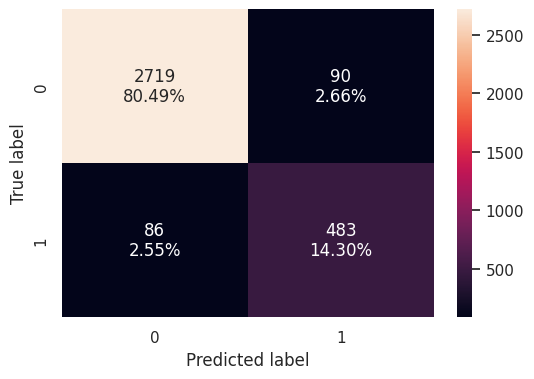

In [75]:
model_confusion_matrix(dt_classifier, X_test, y_test)

In [64]:
dt_perf_test = model_performance_classification(dt_classifier, X_test, y_test)
dt_perf_test

Accuracy    Recall  Precision        F1
0  0.947898  0.848858   0.842932  0.845884

Train AUC: 1.00


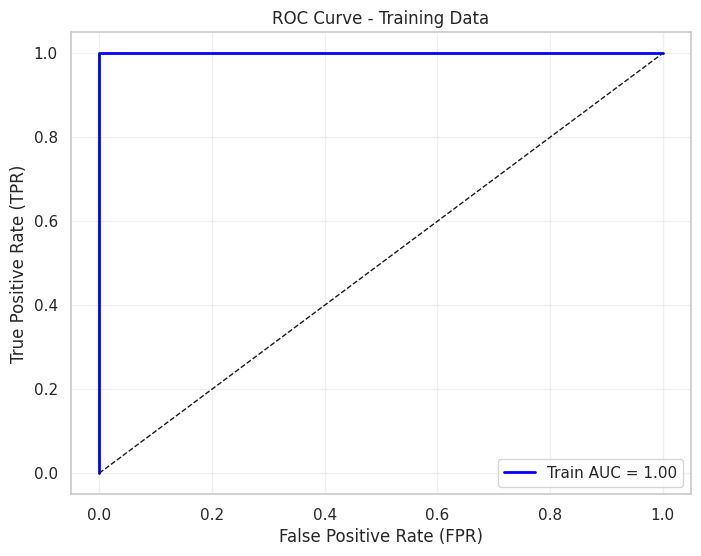

Test AUC: 0.91


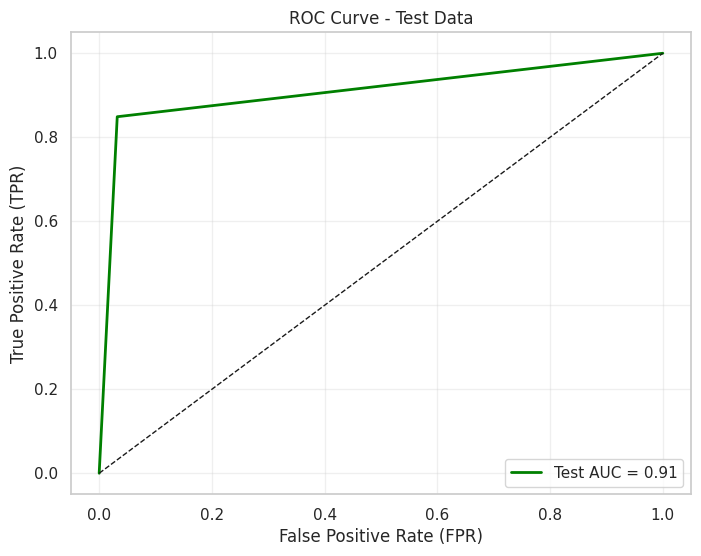

In [77]:
y_train_proba = dt_classifier.predict_proba(X_train)[:, 1]
y_test_proba = dt_classifier.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print(f"Train AUC: {roc_auc_train:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Test AUC: {roc_auc_test:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## **Model Tuning and business implication**

### **Ensemble Models**

#### **Random Forest**

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_model = rf_classifier.fit(X_train, y_train)

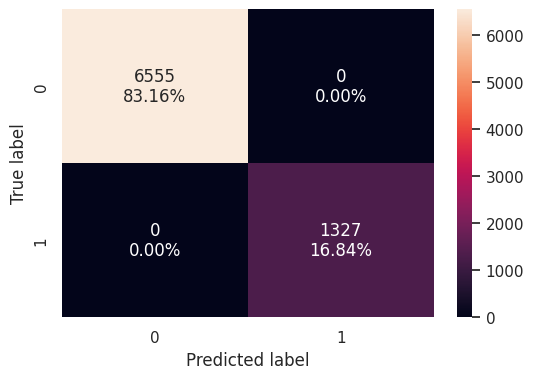

In [128]:
model_confusion_matrix(rf_model, X_train, y_train)

In [66]:
rf_perf_train = model_performance_classification(rf_model, X_train, y_train)
rf_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

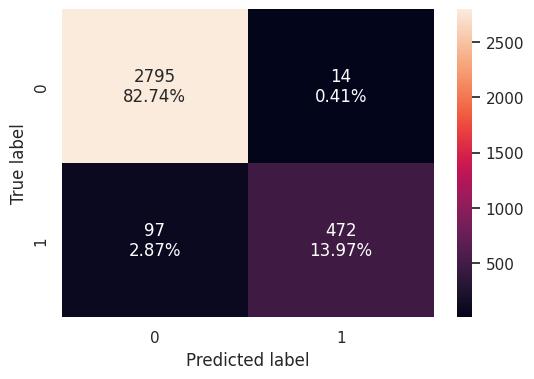

In [137]:
model_confusion_matrix(rf_model, X_test, y_test)

In [67]:
rf_perf_test = model_performance_classification(rf_model, X_test, y_test)
rf_perf_test

Accuracy    Recall  Precision        F1
0   0.96714  0.829525   0.971193  0.894787

Train AUC: 1.00


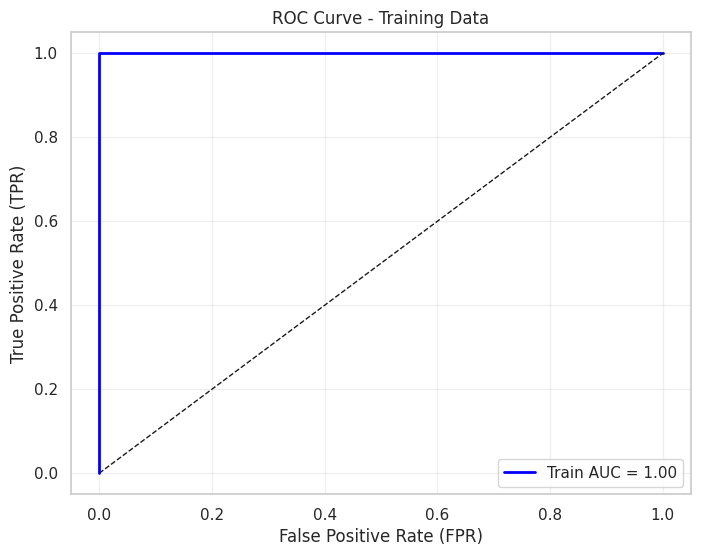

Test AUC: 0.99


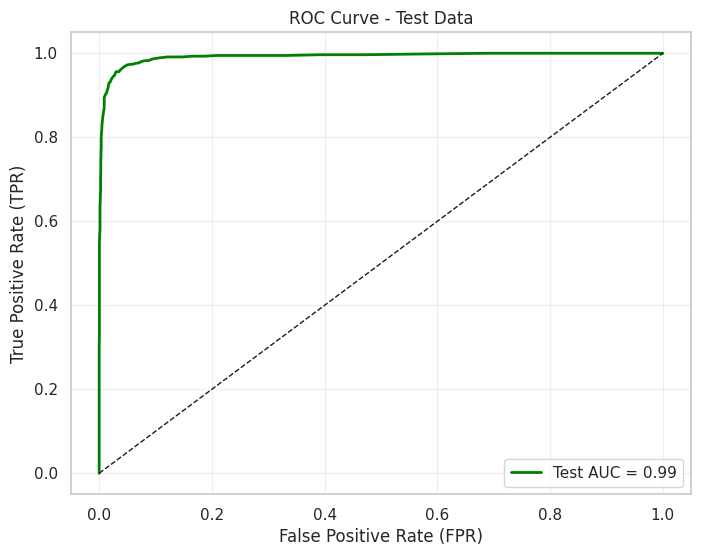

In [132]:
y_train_proba = rf_model.predict_proba(X_train)[:, 1]
y_test_proba = rf_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print(f"Train AUC: {roc_auc_train:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Test AUC: {roc_auc_test:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### **Gradient Boosting**

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

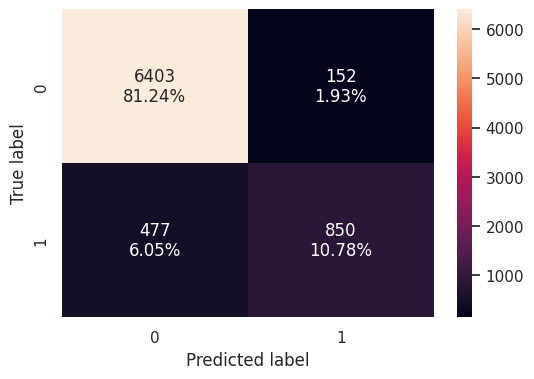

In [85]:
model_confusion_matrix(gb_classifier, X_train, y_train)

In [69]:
gb_perf_train = model_performance_classification(gb_classifier, X_train, y_train)
gb_perf_train

Accuracy    Recall  Precision        F1
0  0.920198  0.640543   0.848303  0.729927

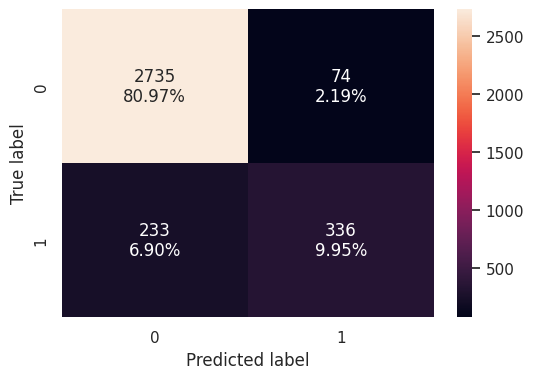

In [87]:
model_confusion_matrix(gb_classifier, X_test, y_test)

In [70]:
gb_perf_test = model_performance_classification(gb_classifier, X_test, y_test)
gb_perf_test

Accuracy   Recall  Precision        F1
0  0.909118  0.59051   0.819512  0.686415

Train AUC: 0.95


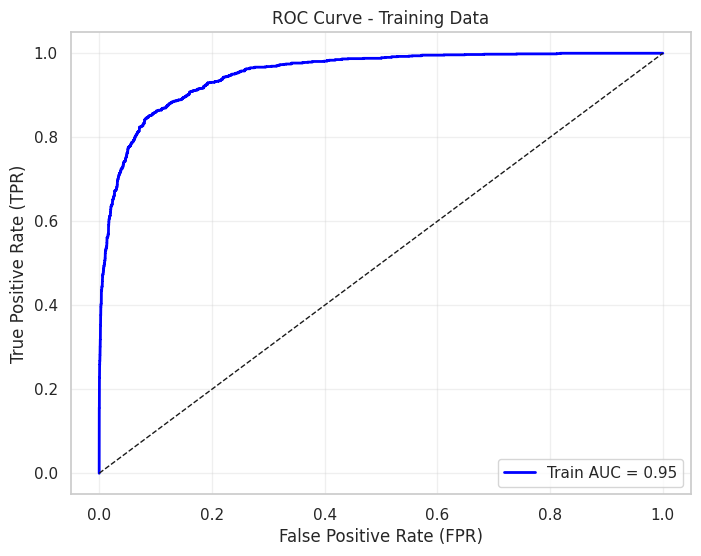

Test AUC: 0.94


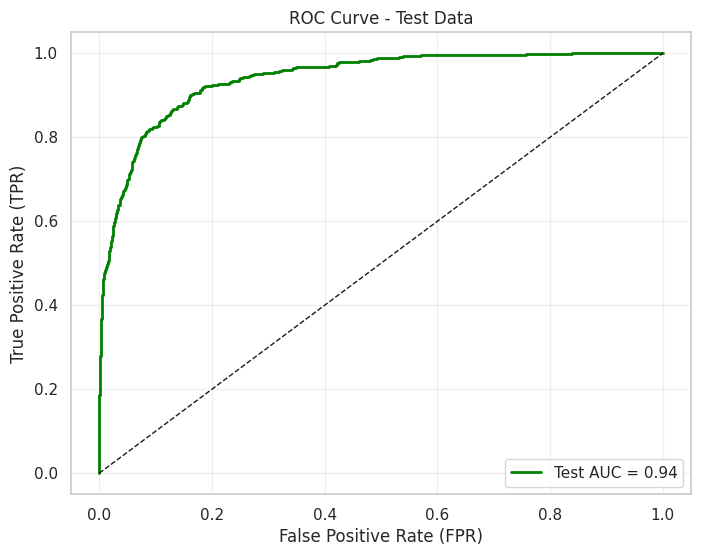

In [89]:
y_train_proba = gb_classifier.predict_proba(X_train)[:, 1]
y_test_proba = gb_classifier.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print(f"Train AUC: {roc_auc_train:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Test AUC: {roc_auc_test:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### **GB model on Resampled data**

In [71]:
smote = SMOTE(random_state=42)
X_train_smote_gb, y_train_smote_gb = smote.fit_resample(X_train, y_train)

gb_classifier_smote = GradientBoostingClassifier(random_state=42)
gb_classifier_smote.fit(X_train_smote_gb, y_train_smote_gb)

GradientBoostingClassifier(random_state=42)

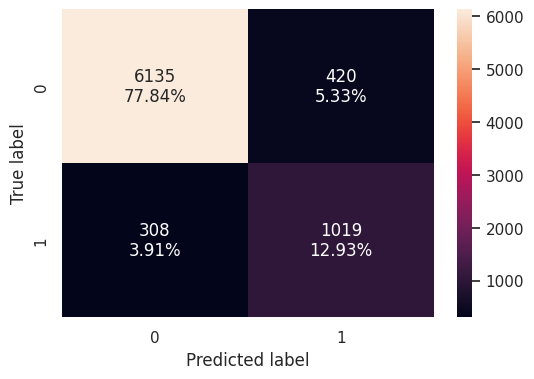

In [91]:
model_confusion_matrix(gb_classifier_smote, X_train, y_train)

In [72]:
gb_smote_train = model_performance_classification(gb_classifier_smote, X_train, y_train)
gb_smote_train

Accuracy    Recall  Precision        F1
0  0.907638  0.767898   0.708131  0.736804

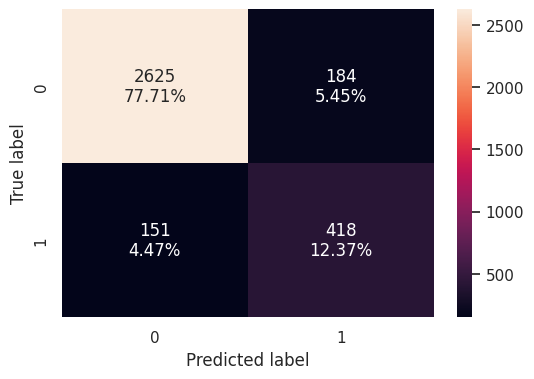

In [93]:
model_confusion_matrix(gb_classifier_smote, X_test, y_test)

In [73]:
gb_smote_test = model_performance_classification(gb_classifier_smote, X_test, y_test)
gb_smote_test

Accuracy    Recall  Precision       F1
0  0.900829  0.734622   0.694352  0.71392

Train AUC: 0.94


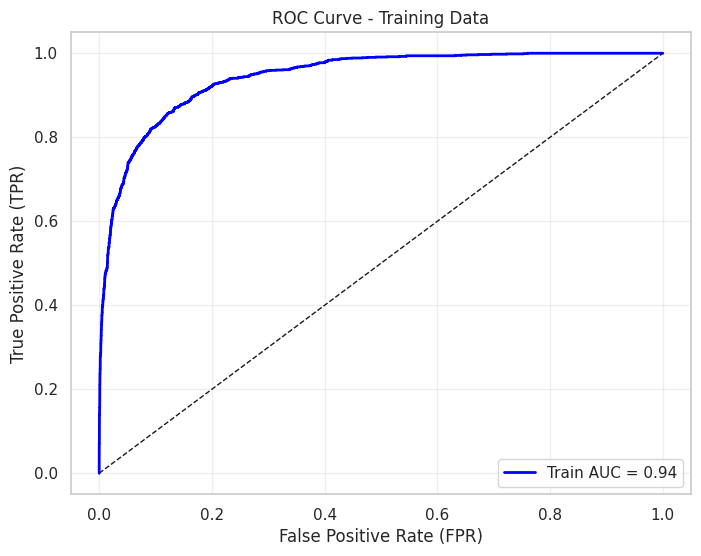

Test AUC: 0.93


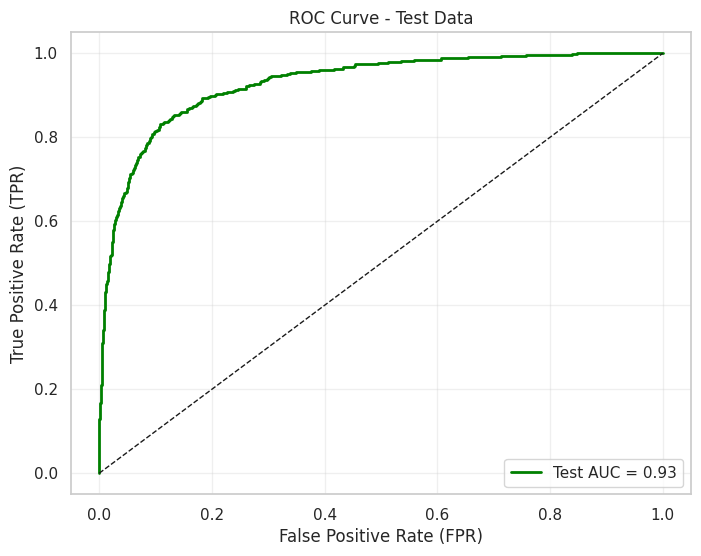

In [95]:
y_train_proba = gb_classifier_smote.predict_proba(X_train)[:, 1]
y_test_proba = gb_classifier_smote.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print(f"Train AUC: {roc_auc_train:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Test AUC: {roc_auc_test:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### **Bagging Classifier**

In [74]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model = BaggingClassifier(estimator=cart, random_state=42)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

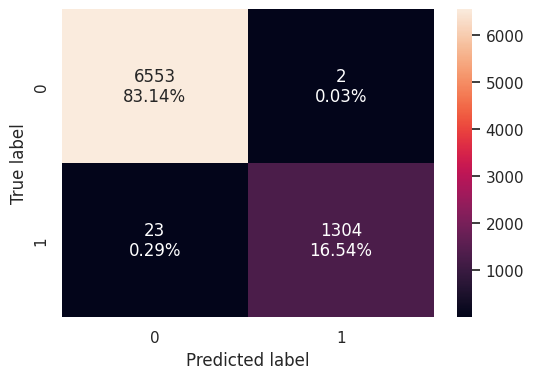

In [141]:
model_confusion_matrix(Bagging_model, X_train, y_train)

In [75]:
bc_train = model_performance_classification(Bagging_model, X_train, y_train)
bc_train

Accuracy    Recall  Precision        F1
0  0.996828  0.982668   0.998469  0.990505

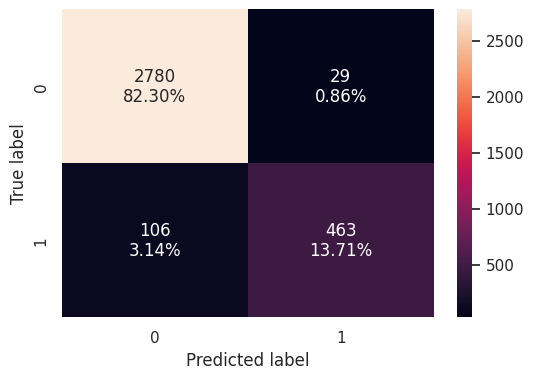

In [145]:
model_confusion_matrix(Bagging_model, X_test, y_test)

In [76]:
bc_test = model_performance_classification(Bagging_model, X_test, y_test)
bc_test

Accuracy    Recall  Precision        F1
0  0.960036  0.813708   0.941057  0.872762

Train AUC: 1.00


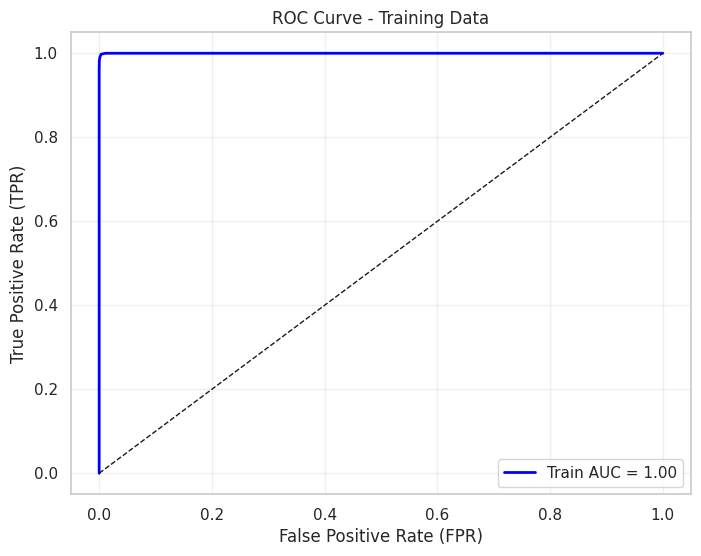

Test AUC: 0.98


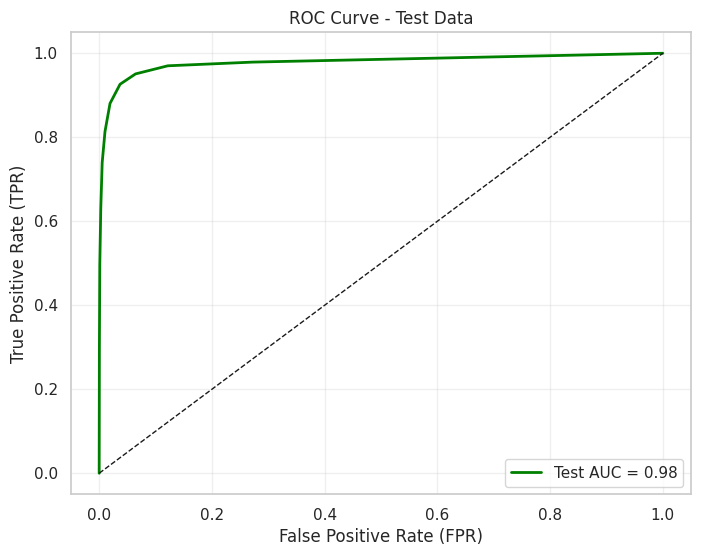

In [147]:
y_train_proba = Bagging_model.predict_proba(X_train)[:, 1]
y_test_proba = Bagging_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print(f"Train AUC: {roc_auc_train:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Test AUC: {roc_auc_test:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### **Model Tuning**

#### Tuned Random Forest

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [6, 7, 8],
}

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)

Best parameters: {'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 300}


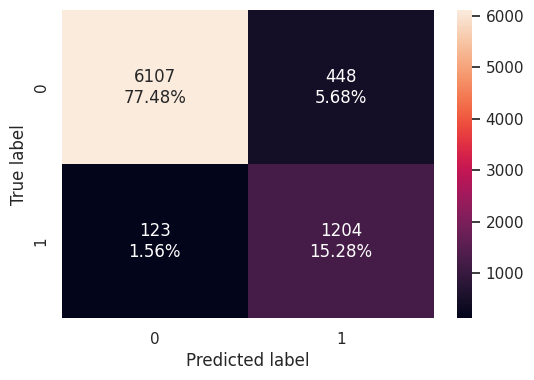

In [99]:
model_confusion_matrix(grid_search_rf, X_train, y_train)

In [79]:
rf_grid_train = model_performance_classification(grid_search_rf, X_train, y_train)
rf_grid_train

Accuracy   Recall  Precision        F1
0  0.927556  0.90731   0.728814  0.808325

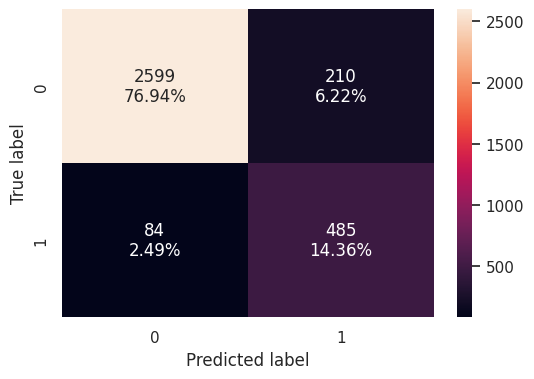

In [101]:
model_confusion_matrix(grid_search_rf, X_test, y_test)

In [80]:
rf_grid_test = model_performance_classification(grid_search_rf, X_test, y_test)
rf_grid_test

Accuracy    Recall  Precision        F1
0  0.912966  0.852373   0.697842  0.767405

Train AUC: 0.98


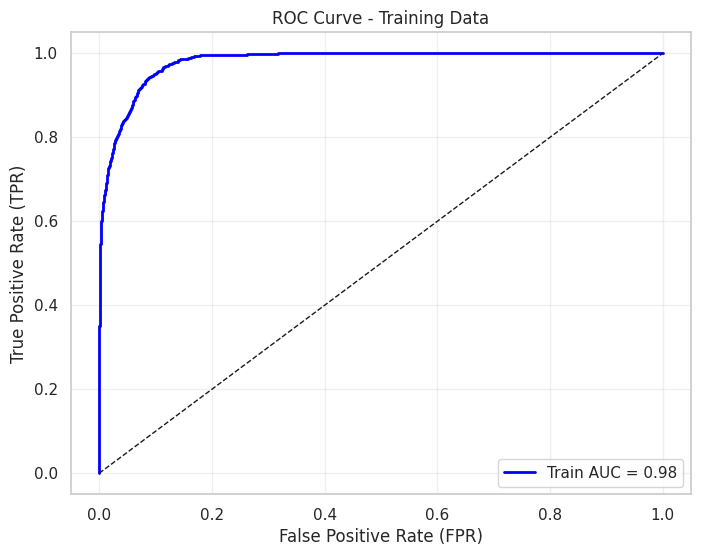

Test AUC: 0.96


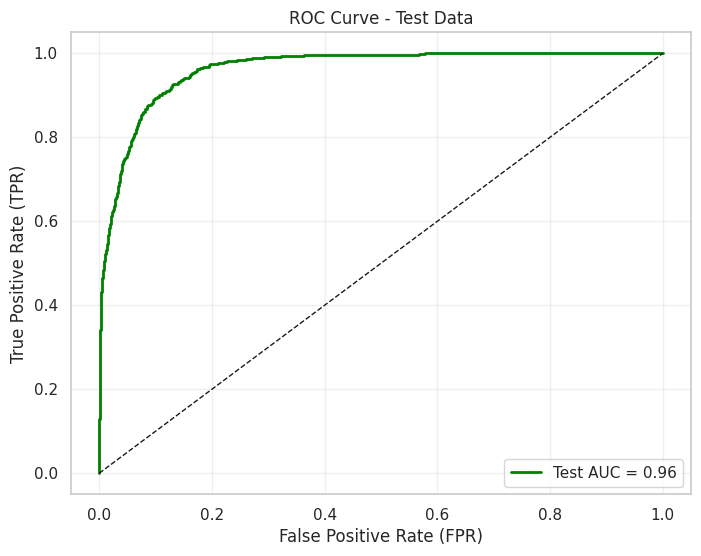

In [103]:
y_train_proba = grid_search_rf.predict_proba(X_train)[:, 1]
y_test_proba = grid_search_rf.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print(f"Train AUC: {roc_auc_train:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Test AUC: {roc_auc_test:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### Tuned Decision Tree

In [81]:
param_grid = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    verbose=2,
    n_jobs=-1
)

grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=2)

In [82]:
print("Best parameters:", grid_search_dt.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


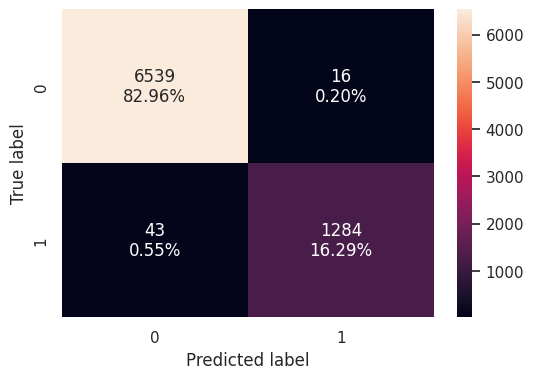

In [106]:
model_confusion_matrix(grid_search_dt, X_train, y_train)

In [83]:
dt_grid_train = model_performance_classification(grid_search_dt, X_train, y_train)
dt_grid_train

Accuracy    Recall  Precision        F1
0  0.992515  0.967596   0.987692  0.977541

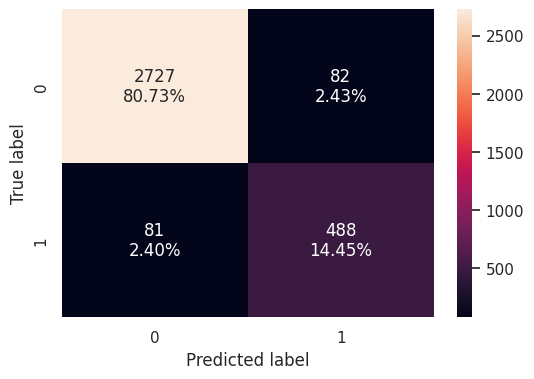

In [108]:
model_confusion_matrix(grid_search_dt, X_test, y_test)

In [84]:
dt_grid_test = model_performance_classification(grid_search_dt, X_test, y_test)
dt_grid_test

Accuracy    Recall  Precision        F1
0  0.951747  0.857645    0.85614  0.856892

Train AUC: 1.00


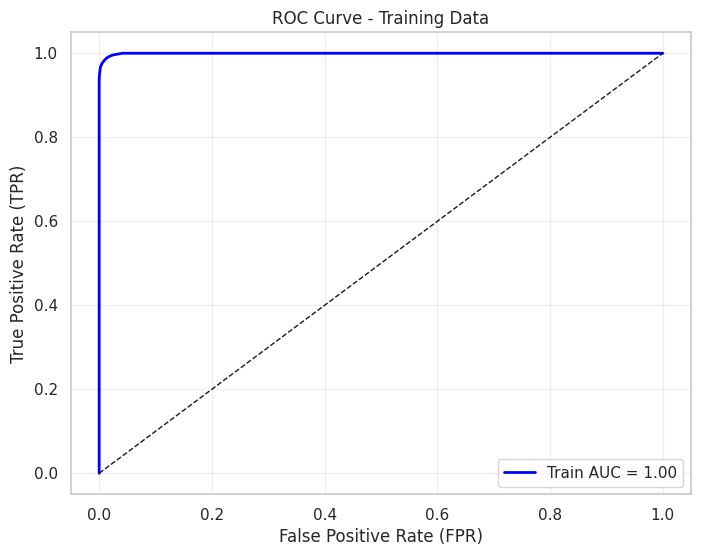

Test AUC: 0.93


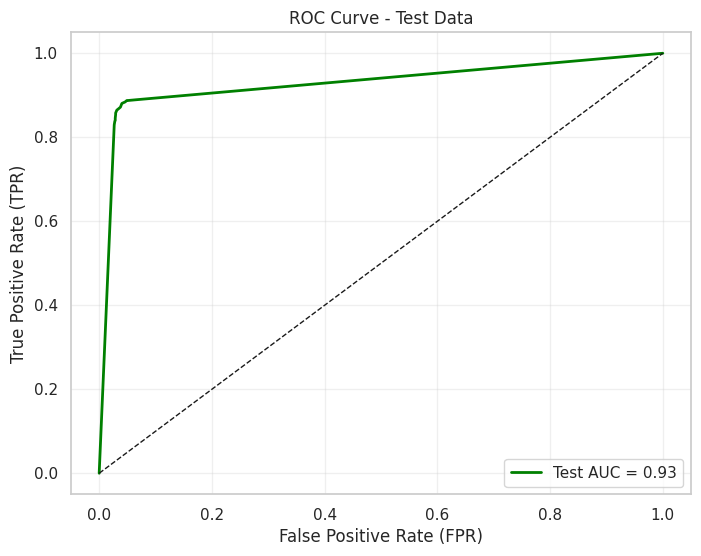

In [110]:
y_train_proba = grid_search_dt.predict_proba(X_train)[:, 1]
y_test_proba = grid_search_dt.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print(f"Train AUC: {roc_auc_train:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Test AUC: {roc_auc_test:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

#### **Tuned Bagging Classifier**

In [85]:
cart = DecisionTreeClassifier(random_state=42)

bagging = BaggingClassifier(estimator=cart, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'estimator__max_depth': [3, 5, 10],
    'estimator__min_samples_split': [2, 5, 10],
}

bc_grid = GridSearchCV(
    estimator=bagging,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    verbose=2,
    n_jobs=-1
)

bc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [3, 5, 10],
                         'estimator__min_samples_split': [2, 5, 10],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [50, 100, 150]},
             scoring='recall', verbose=2)

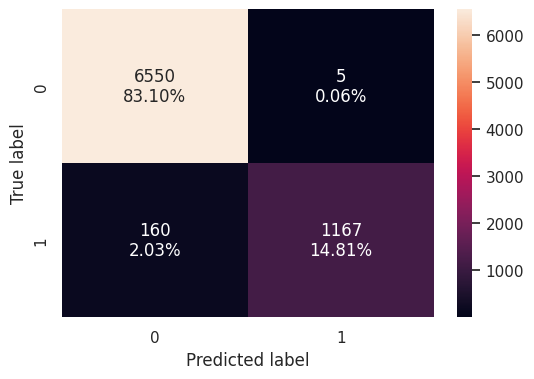

In [157]:
model_confusion_matrix(bc_grid, X_train, y_train)

In [86]:
bc_grid_train = model_performance_classification(bc_grid, X_train, y_train)
bc_grid_train

Accuracy    Recall  Precision        F1
0  0.979066  0.879427   0.995734  0.933974

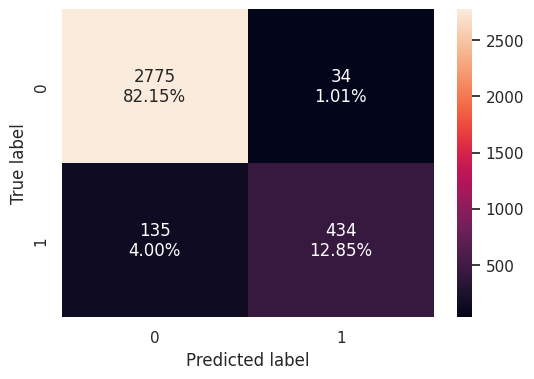

In [154]:
model_confusion_matrix(bc_grid, X_test, y_test)

In [87]:
bc_grid_test = model_performance_classification(bc_grid, X_test, y_test)
bc_grid_test

Accuracy    Recall  Precision       F1
0   0.94997  0.762742    0.92735  0.83703

Train AUC: 1.00


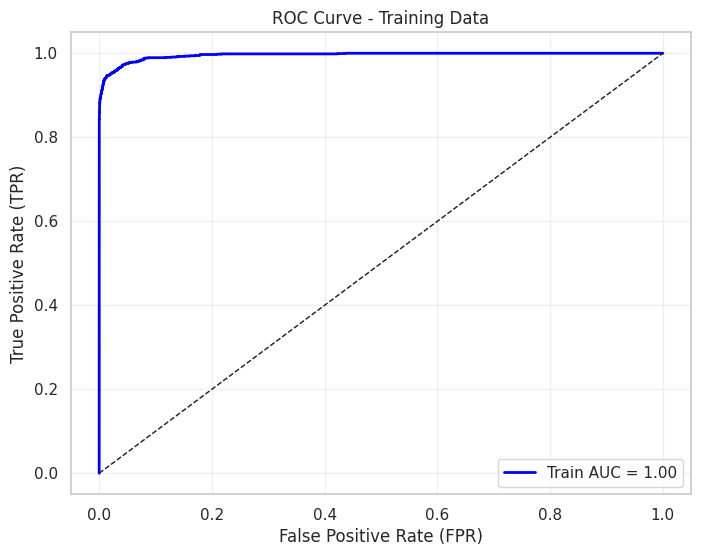

Test AUC: 0.98


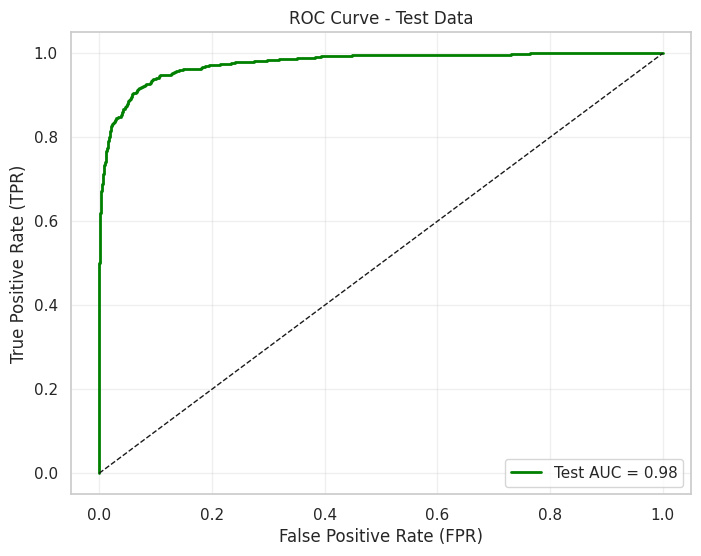

In [168]:
y_train_proba = bc_grid.predict_proba(X_train)[:, 1]
y_test_proba = bc_grid.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

print(f"Train AUC: {roc_auc_train:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Test AUC: {roc_auc_test:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title('ROC Curve - Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### **Model Comparison**

In [88]:
models_train_comp_df = pd.concat(
    [
        lr_perf_train.T,
        lr_train_smote.T,
        lda_perf_train.T,
        lda_smote_train.T,
        dt_perf_train.T,
        rf_perf_train.T,
        gb_perf_train.T,
        gb_smote_train.T,
        bc_train.T,
        rf_grid_train.T,
        dt_grid_train.T,
        bc_grid_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression SMOTE",
    "LDA",
    "LDA SMOTE",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "Gradient Boosting SMOTE",
    "Bagging Classifier",
    "Tuned Random Forest",
    "Tuned Decision Tree",
    "Tuned Bagging Classifier"
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


Accuracy    Recall  Precision        F1
Logistic Regression        0.880614  0.415222   0.769553  0.539403
Logistic Regression SMOTE  0.774169  0.781462   0.410368  0.538142
LDA                        0.869449  0.334589   0.752542  0.463224
LDA SMOTE                  0.754250  0.785230   0.386785  0.518279
Decision Tree              1.000000  1.000000   1.000000  1.000000
Random Forest              1.000000  1.000000   1.000000  1.000000
Gradient Boosting          0.920198  0.640543   0.848303  0.729927
Gradient Boosting SMOTE    0.907638  0.767898   0.708131  0.736804
Bagging Classifier         0.996828  0.982668   0.998469  0.990505
Tuned Random Forest        0.927556  0.907310   0.728814  0.808325
Tuned Decision Tree        0.992515  0.967596   0.987692  0.977541
Tuned Bagging Classifier   0.979066  0.879427   0.995734  0.933974

In [89]:
models_test_comp_df = pd.concat(
    [
        lr_perf_test.T,
        lr_test_smote.T,
        lda_perf_test.T,
        lda_smote_test.T,
        dt_perf_test.T,
        rf_perf_test.T,
        gb_perf_test.T,
        gb_smote_test.T,
        bc_test.T,
        rf_grid_test.T,
        dt_grid_test.T,
        bc_grid_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression SMOTE",
    "LDA",
    "LDA SMOTE",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "Gradient Boosting SMOTE",
    "Bagging Classifier",
    "Tuned Random Forest",
    "Tuned Decision Tree",
    "Tuned Bagging Classifier"
]
print("Testing performance comparison:")
models_test_comp_df.T

Testing performance comparison:


Accuracy    Recall  Precision        F1
Logistic Regression        0.886619  0.444640   0.790625  0.569179
Logistic Regression SMOTE  0.755773  0.801406   0.390411  0.525043
LDA                        0.871818  0.356766   0.751852  0.483909
LDA SMOTE                  0.739787  0.797891   0.372742  0.508114
Decision Tree              0.947898  0.848858   0.842932  0.845884
Random Forest              0.967140  0.829525   0.971193  0.894787
Gradient Boosting          0.909118  0.590510   0.819512  0.686415
Gradient Boosting SMOTE    0.900829  0.734622   0.694352  0.713920
Bagging Classifier         0.960036  0.813708   0.941057  0.872762
Tuned Random Forest        0.912966  0.852373   0.697842  0.767405
Tuned Decision Tree        0.951747  0.857645   0.856140  0.856892
Tuned Bagging Classifier   0.949970  0.762742   0.927350  0.837030

### **Feature Importance Using Selected Model**

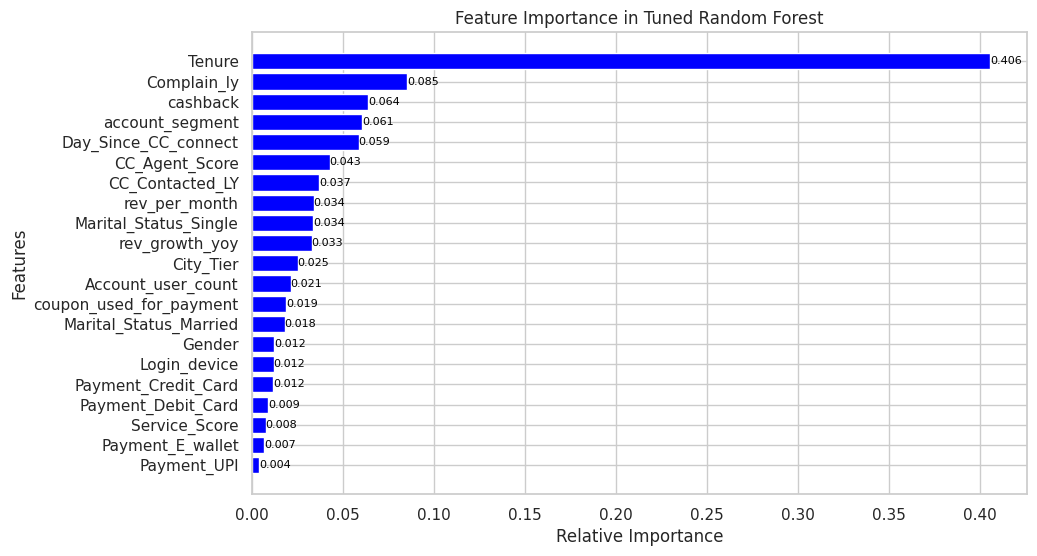

In [94]:
feature_importance = grid_search_rf.best_estimator_.feature_importances_
feature_importance_abs = feature_importance

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_abs
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Tuned Random Forest')
plt.gca().invert_yaxis()

for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center', fontsize=8, color='black')

plt.show()


-----------------------------------------------------------------------------------------------------THE END----------------------------------------------------------------------------------------------------